In [8]:
import pandas as pd
import numpy as np

In [10]:
def count_one(arr):
    counts = arr.value_counts()
    try:
        return counts[1]
    except:
        return 0
    
def count_one_ratio(arr):
    counts = arr.value_counts()
    try:
        return counts[1]/counts.sum()
    except:
        return 0
    
def index2range(x,mi,ma,num):
    ranges = np.linspace(mi,ma,num)
    i = 0
    while i<len(ranges)-1:
        if ranges[i]<=x<ranges[i+1]:
            return str(ranges[i])+'-'+str(ranges[i+1])
        i+=1

In [11]:
train_data = pd.read_csv('../data/full_size/atec_anti_fraud_train.csv',index_col = 0)
testb_data = pd.read_csv('../data/full_size/atec_anti_fraud_test_b.csv',index_col = 0)

In [12]:
feature_names = train_data.columns[2:]
feature_distribution_plot_list = []
for name in feature_names:
    try:
        result = train_data.groupby(name).label.agg(count_one)
        feature_distribution_plot_list.append((name,result))
    except:
        print('{} has problem, data type {},min:{},max:{}'.format(name,train_data[name].dtype,train_data[name].min(),
                                                                 train_data[name].max()))
        print(train_name)

In [13]:
feature_names = train_data.columns[2:]
feature_distribution_ratio_plot_list = []
for name in feature_names:
    try:
        result = train_data.groupby(name).label.agg(count_one_ratio)
        feature_distribution_ratio_plot_list.append((name,result))
    except:
        print('{} has problem, data type {},min:{},max:{}'.format(name,train_data[name].dtype,train_data[name].min(),
                                                                 train_data[name].max()))
        print(train_name)

In [208]:
mi = train_data['f5'].min()
ma = train_data['f5'].max()+1
new_index = feature_distribution_plot_dict['f5'].index.to_series().apply(lambda x:index2range(x,mi,ma,10))
feature_distribution_plot_dict['f5'].groupby(new_index).sum()

f5
10000.0-25600.777777777777                136
134806.22222222222-150407.0               440
25600.777777777777-41201.555555555555       0
41201.555555555555-56802.33333333333       58
56802.33333333333-72403.11111111111         0
72403.11111111111-88003.88888888889         0
88003.88888888889-103604.66666666666     5574
Name: label, dtype: int64

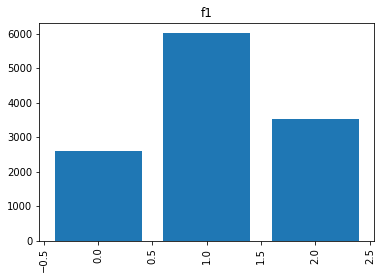

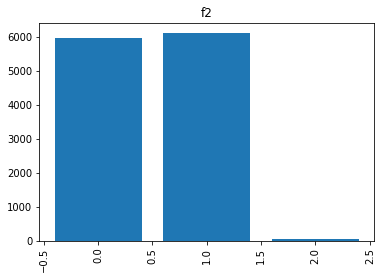

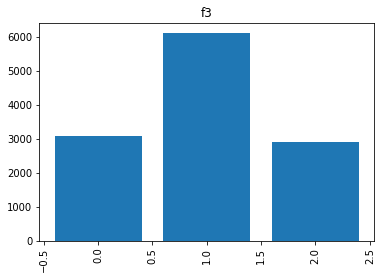

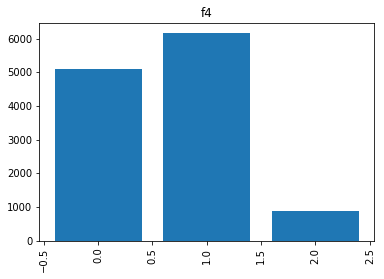

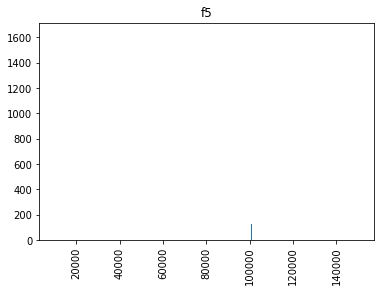

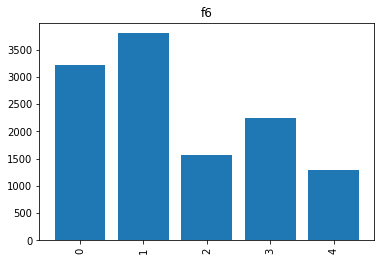

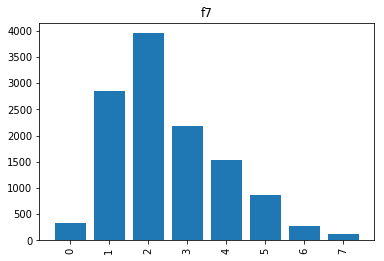

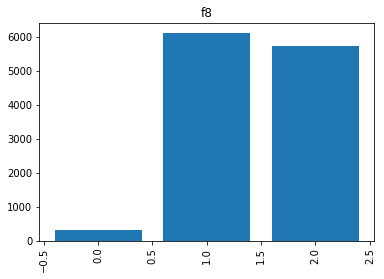

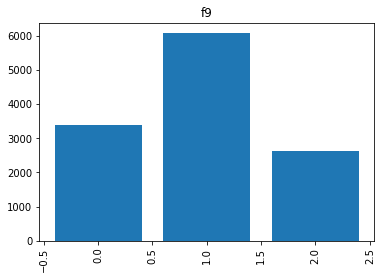

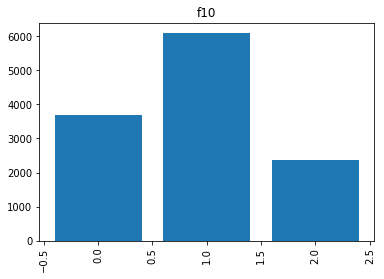

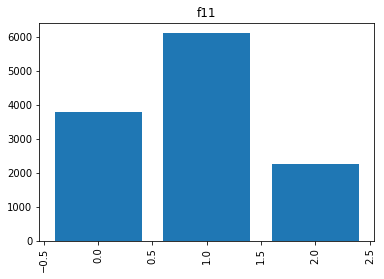

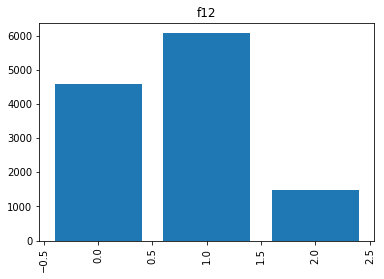

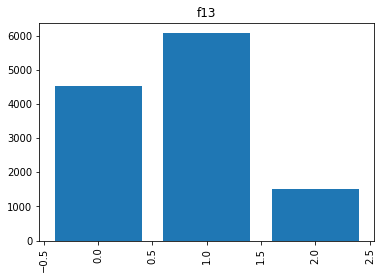

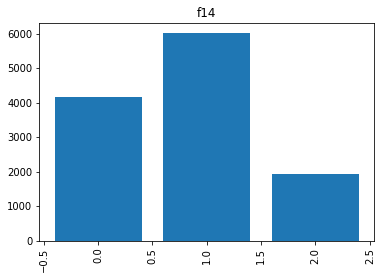

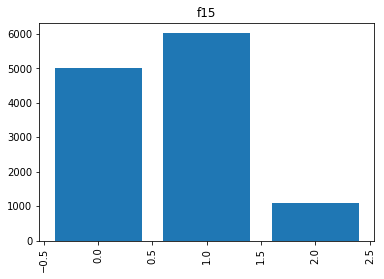

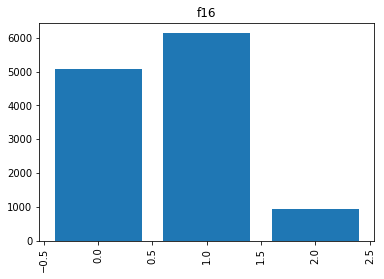

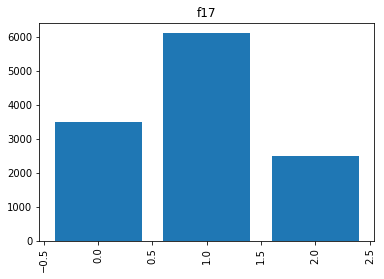

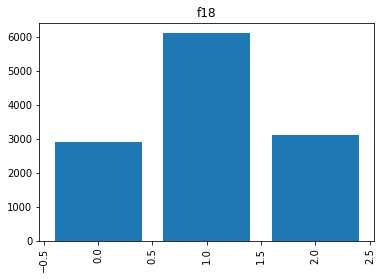

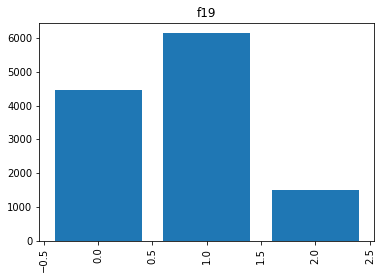

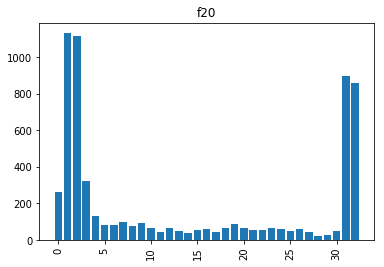

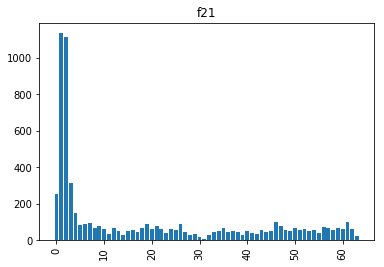

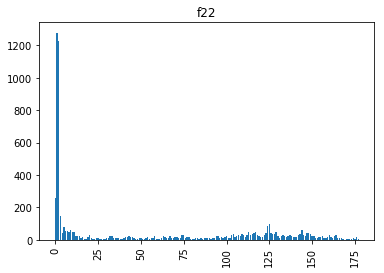

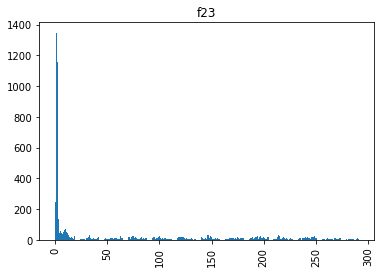

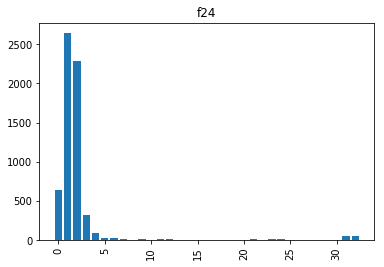

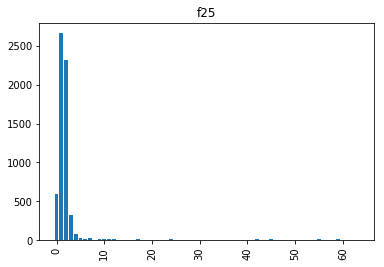

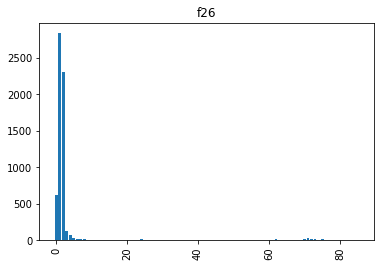

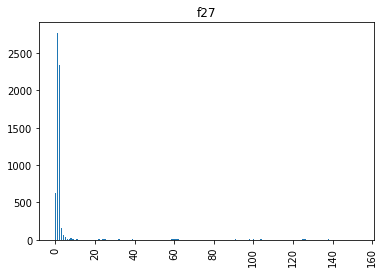

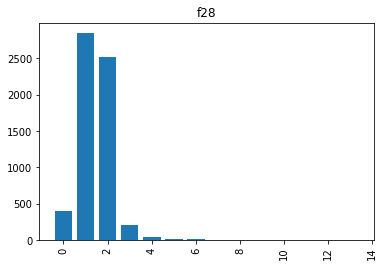

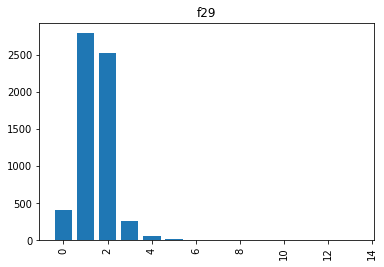

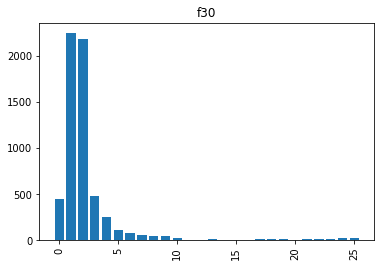

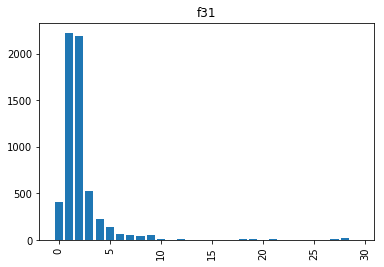

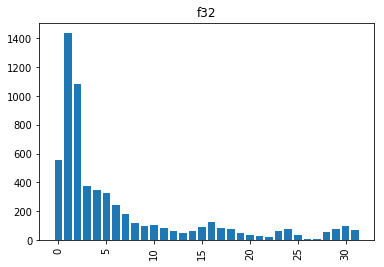

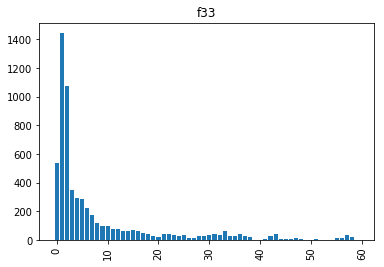

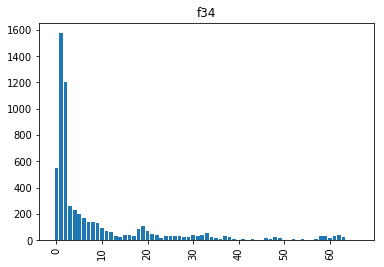

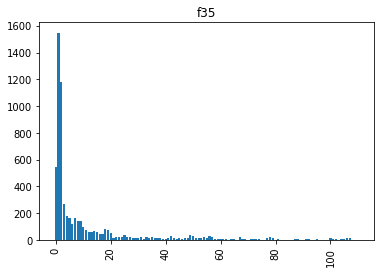

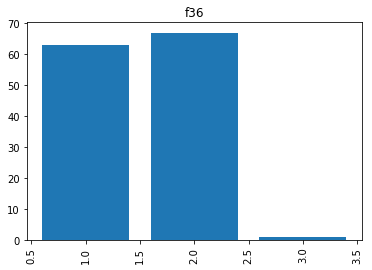

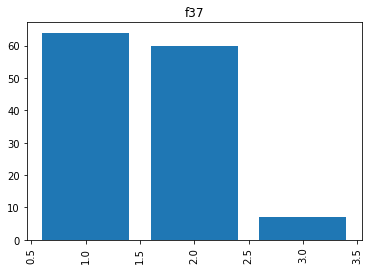

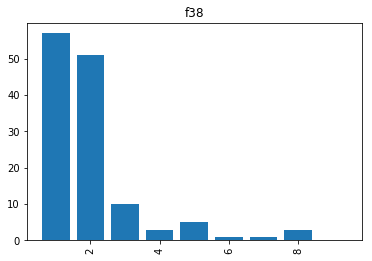

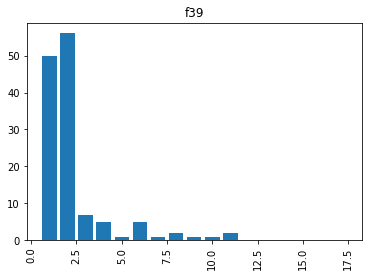

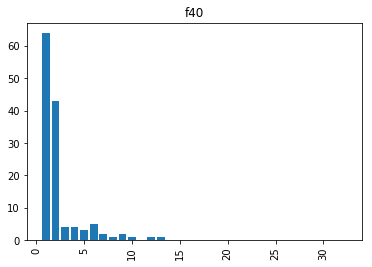

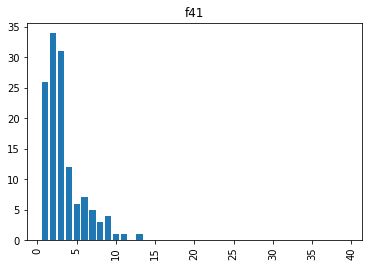

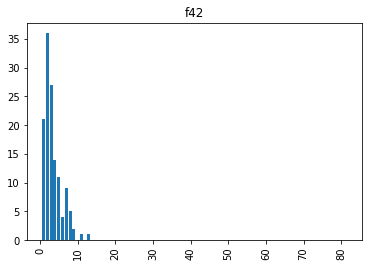

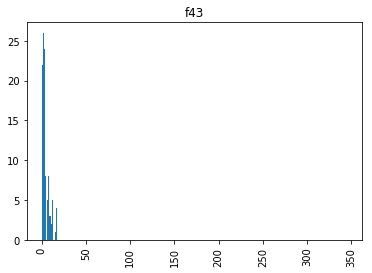

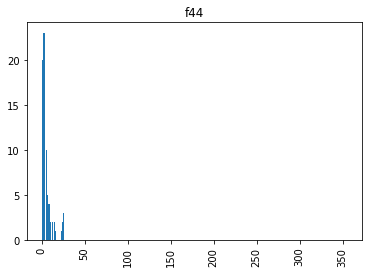

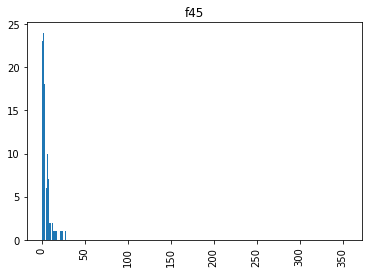

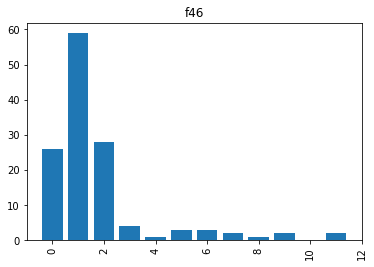

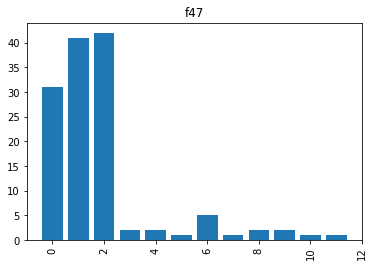

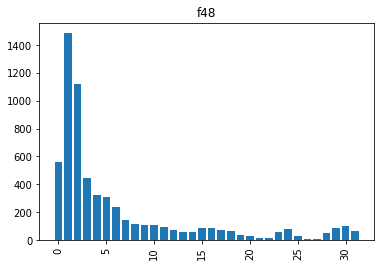

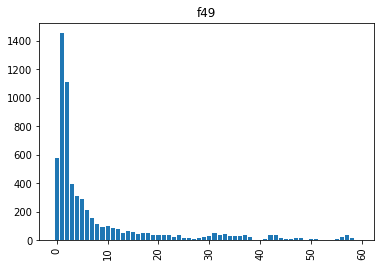

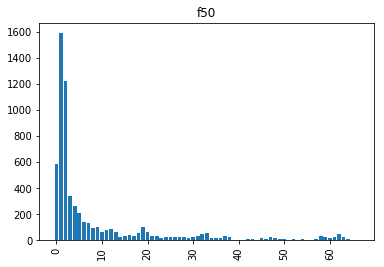

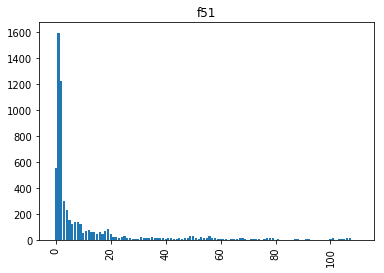

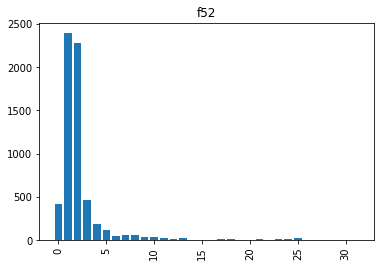

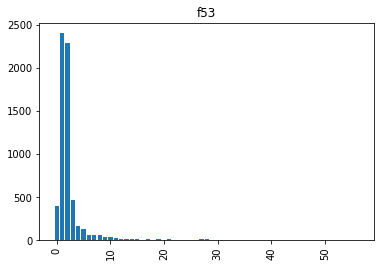

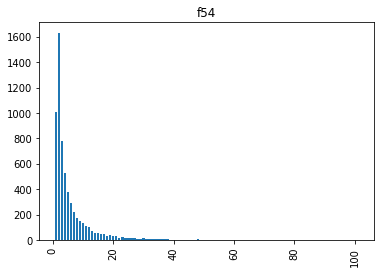

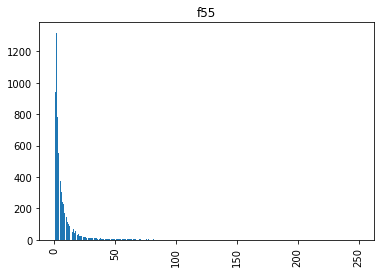

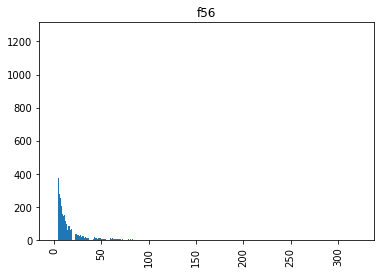

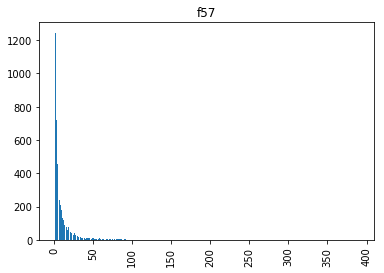

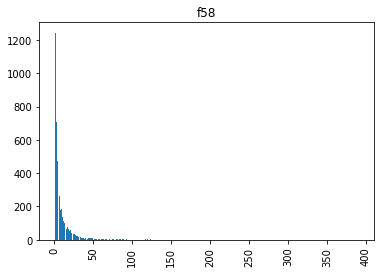

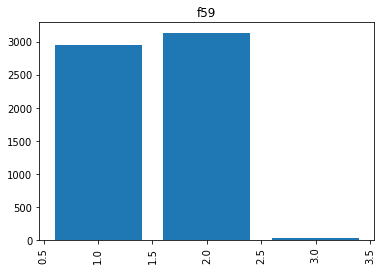

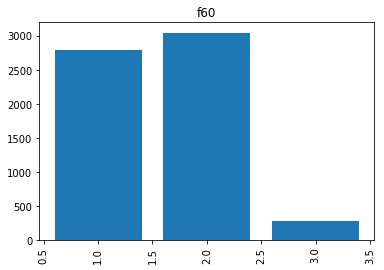

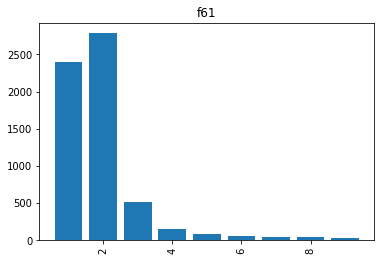

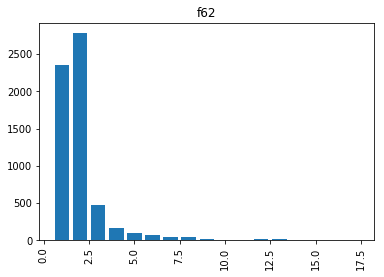

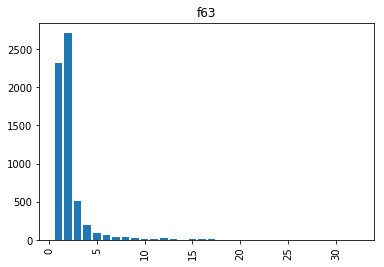

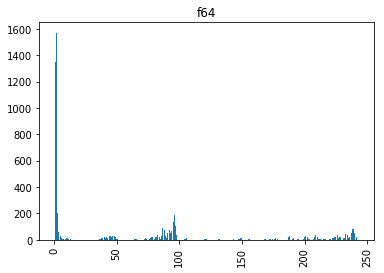

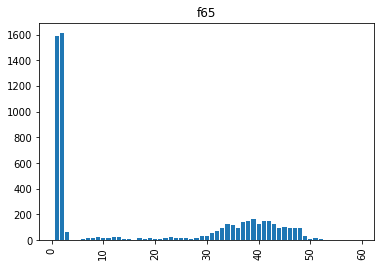

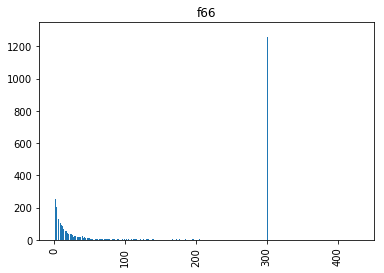

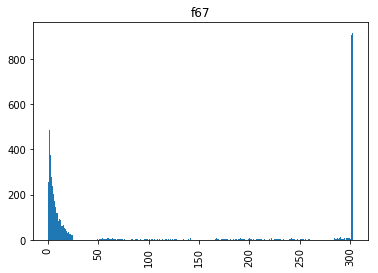

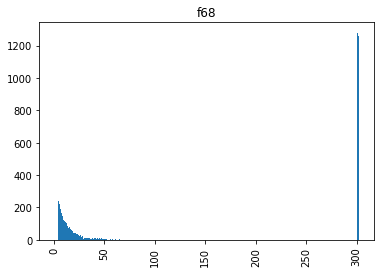

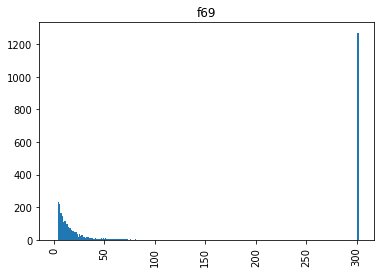

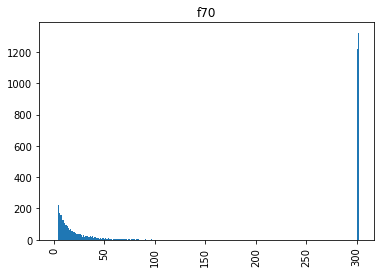

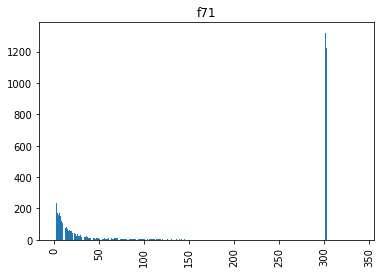

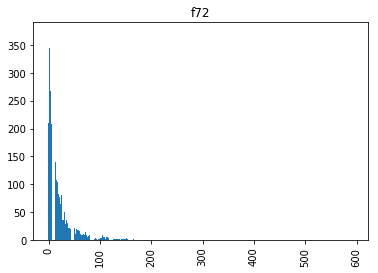

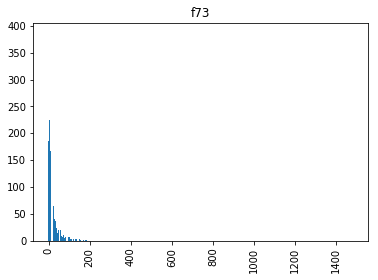

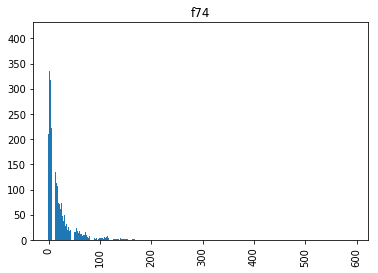

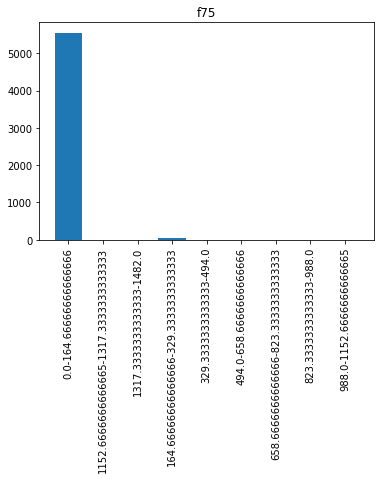

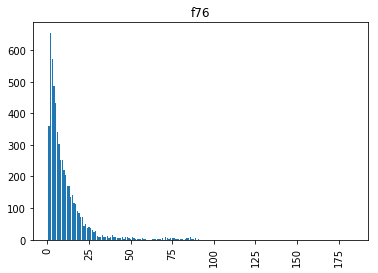

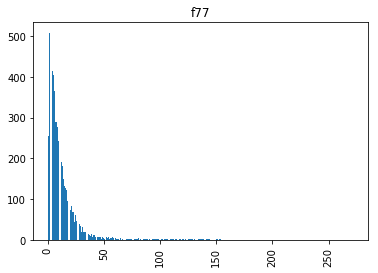

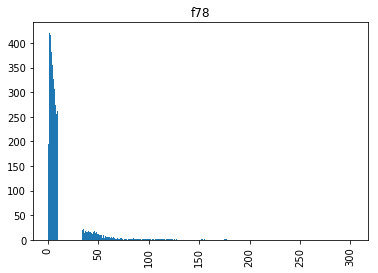

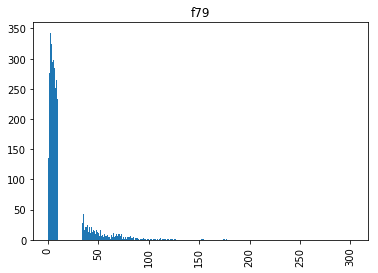

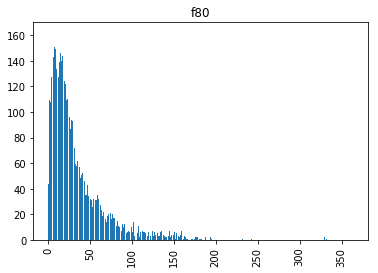

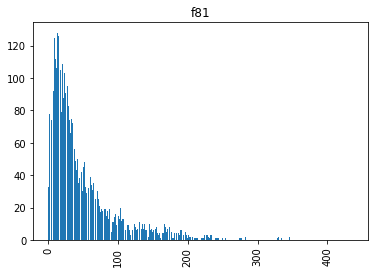

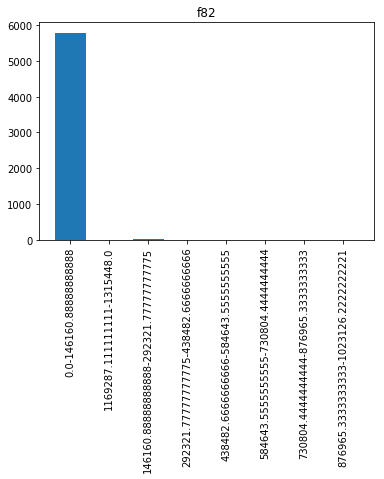

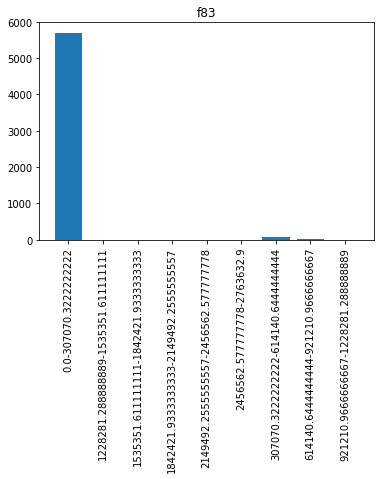

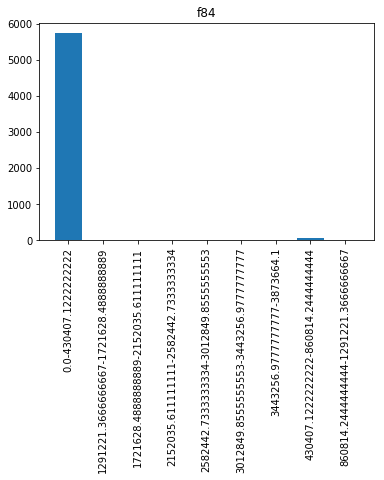

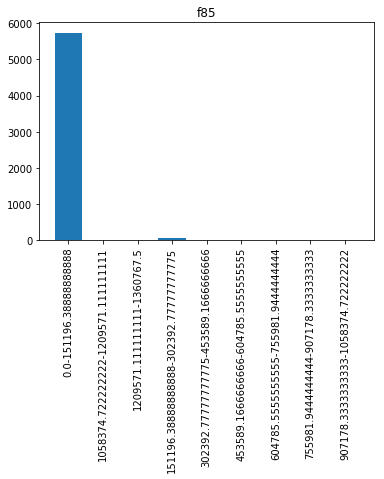

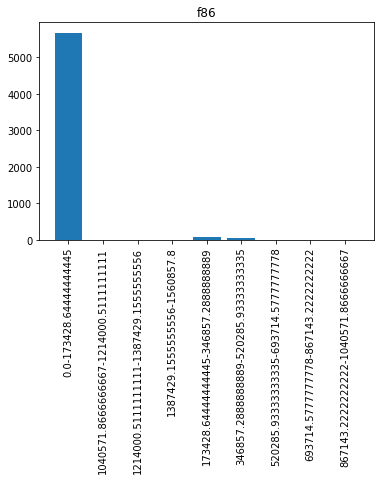

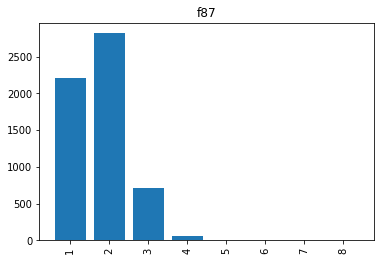

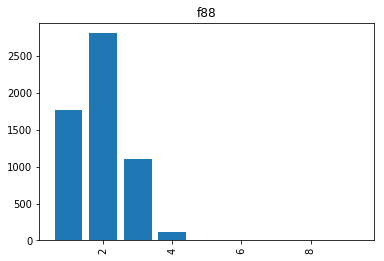

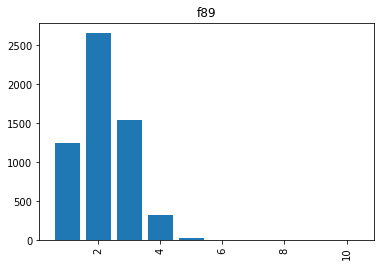

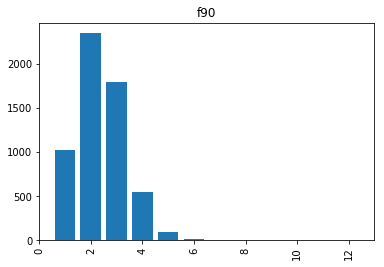

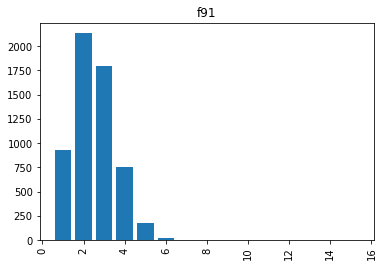

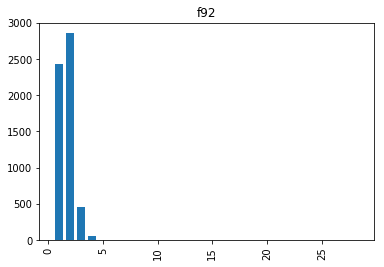

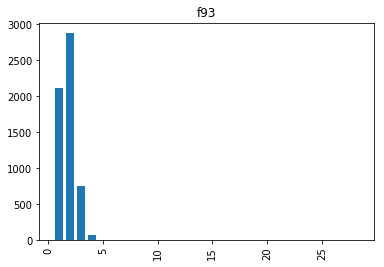

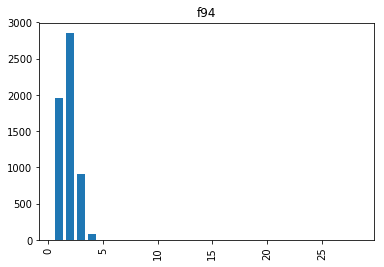

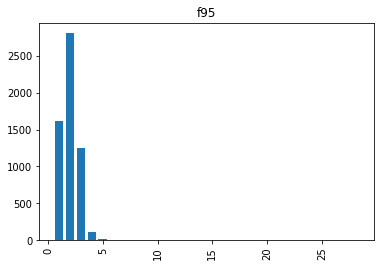

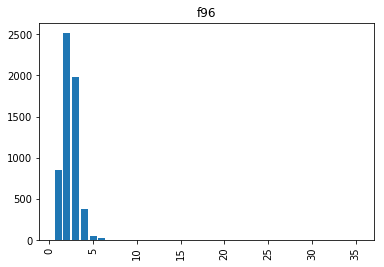

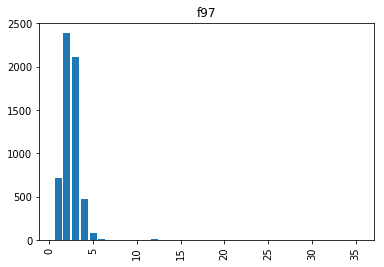

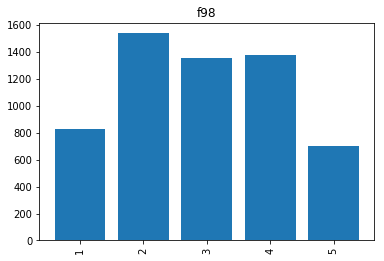

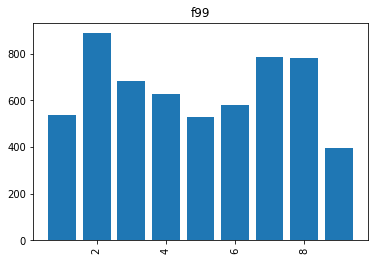

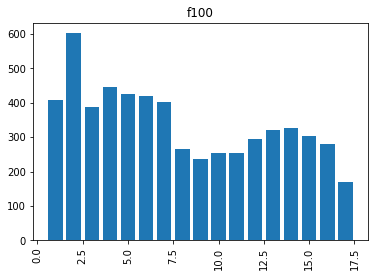

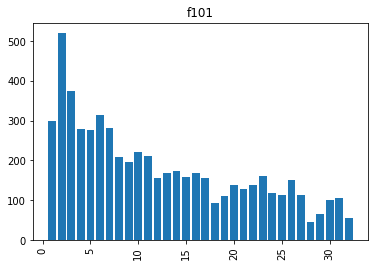

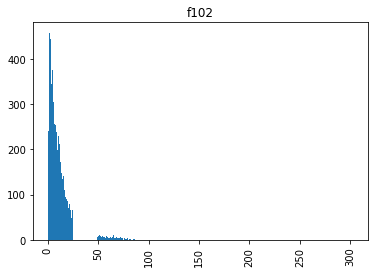

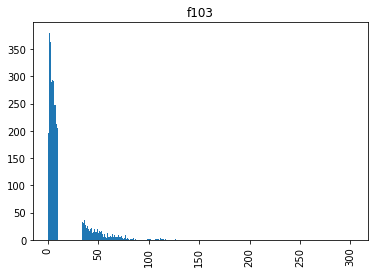

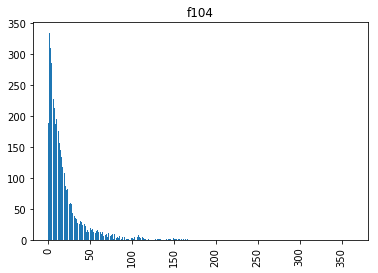

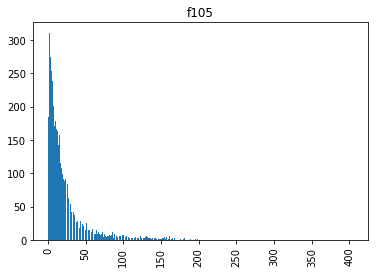

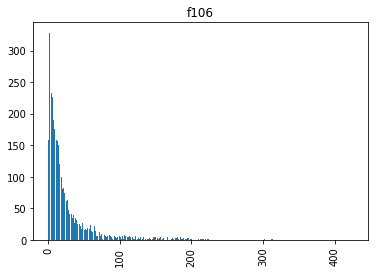

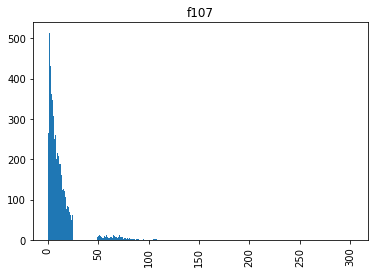

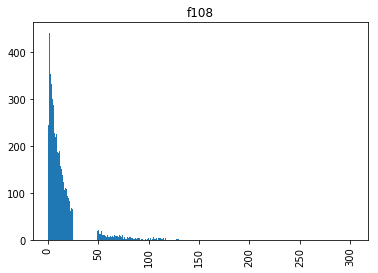

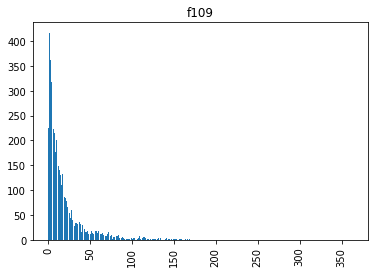

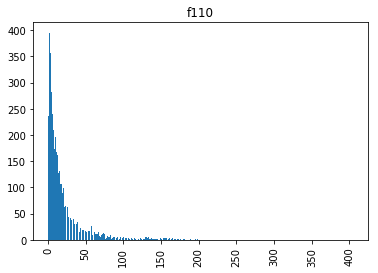

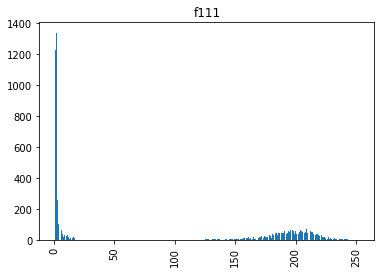

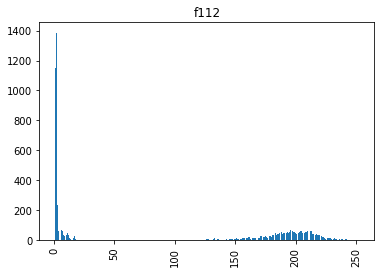

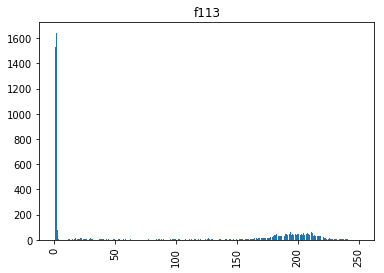

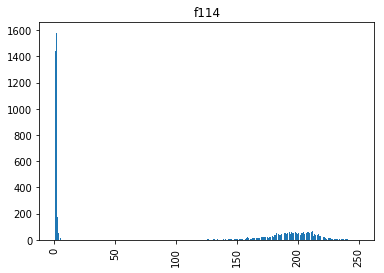

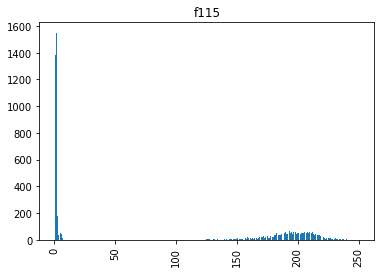

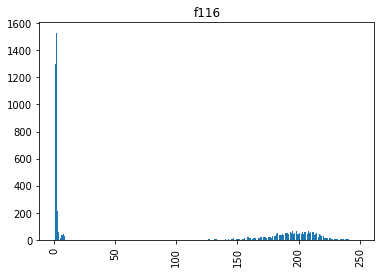

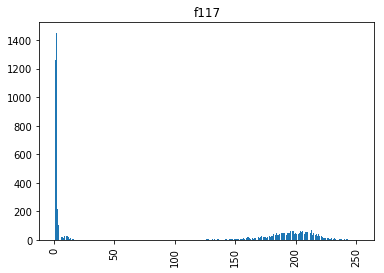

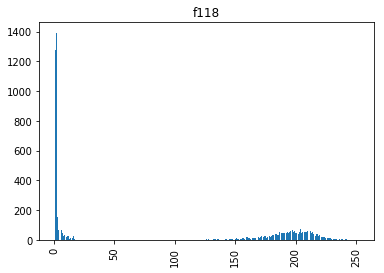

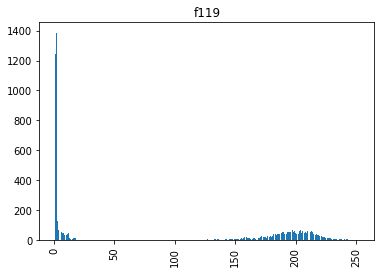

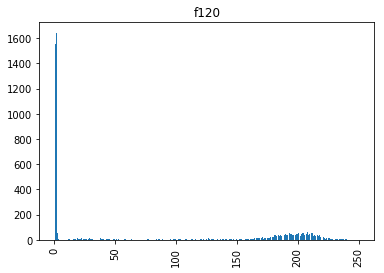

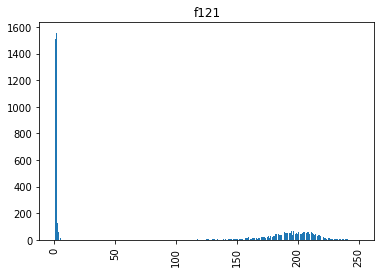

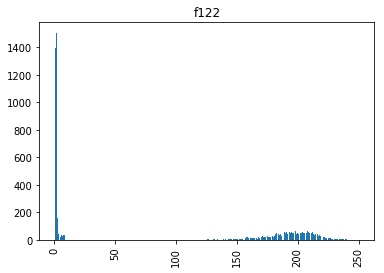

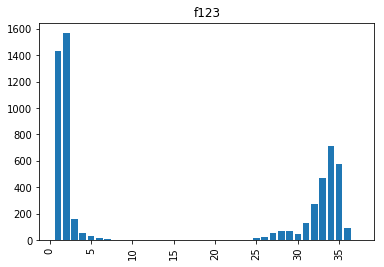

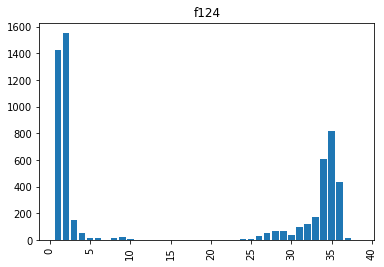

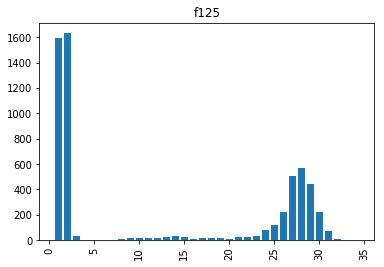

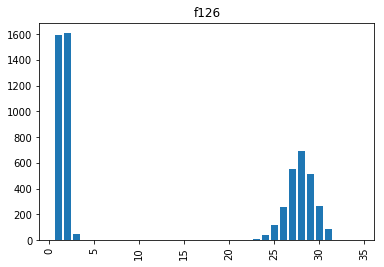

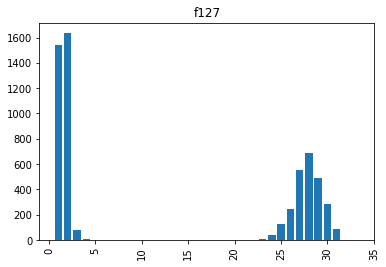

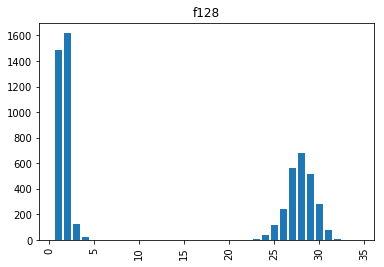

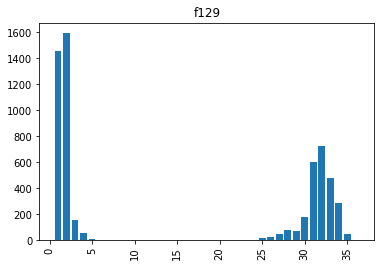

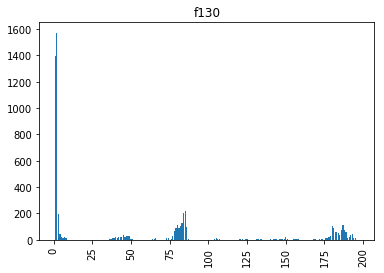

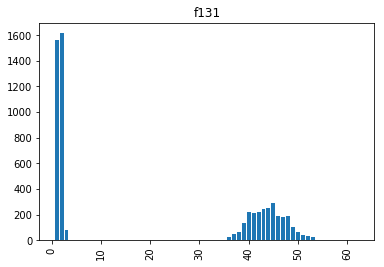

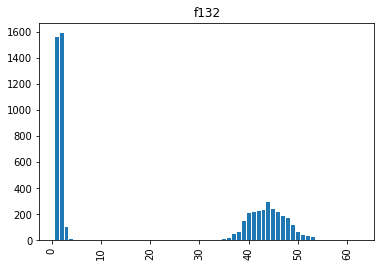

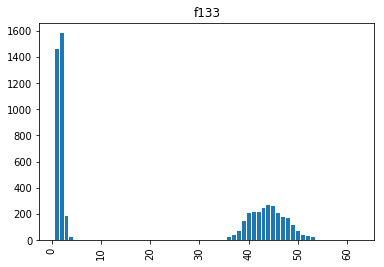

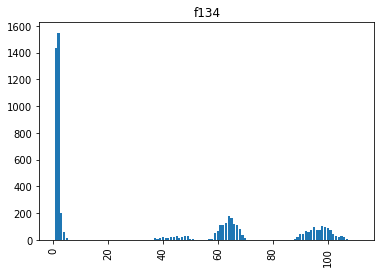

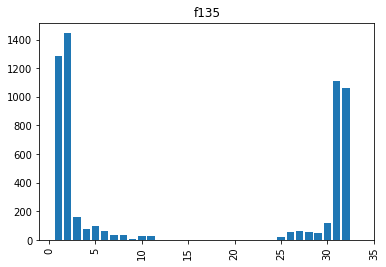

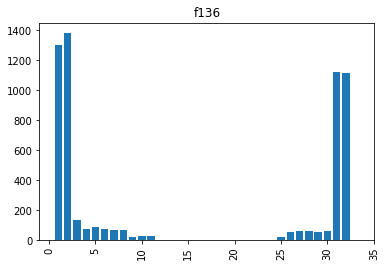

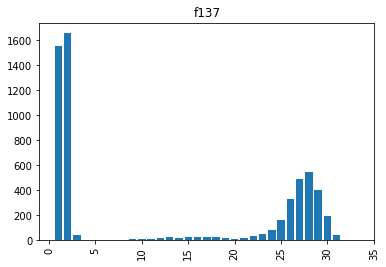

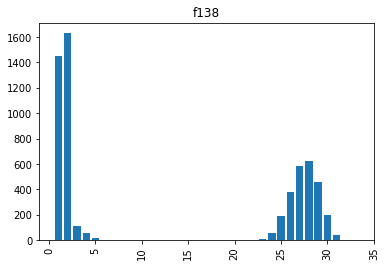

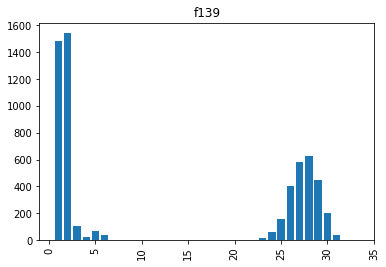

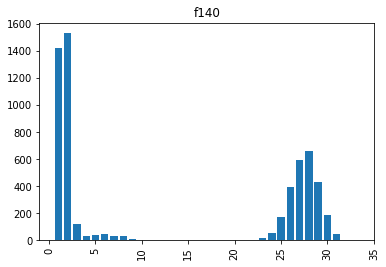

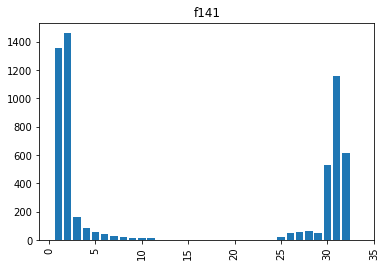

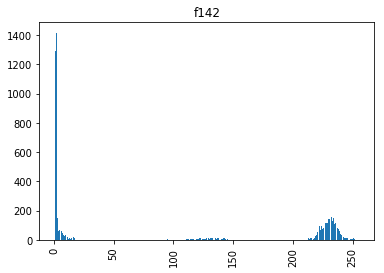

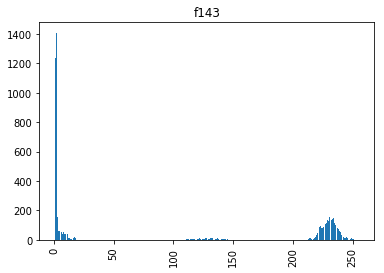

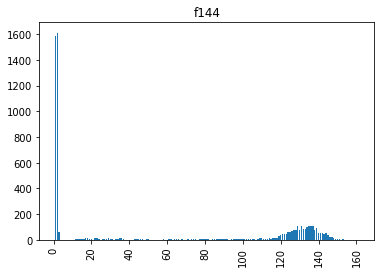

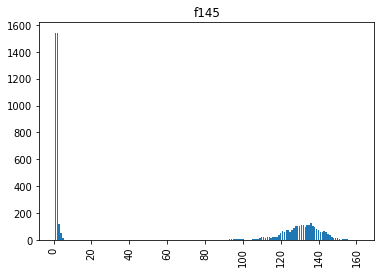

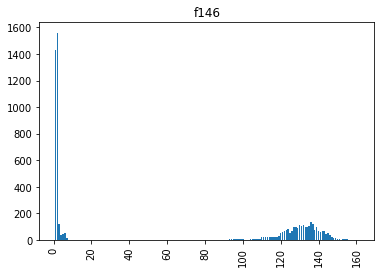

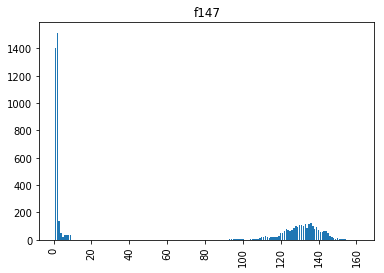

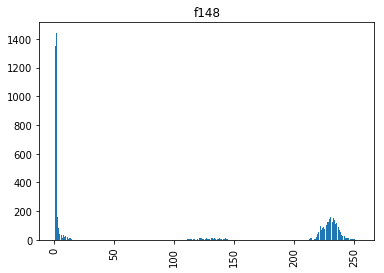

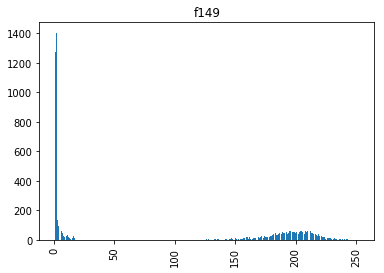

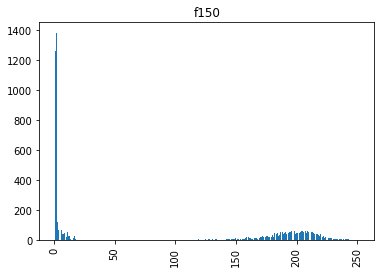

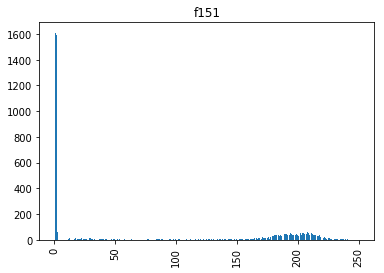

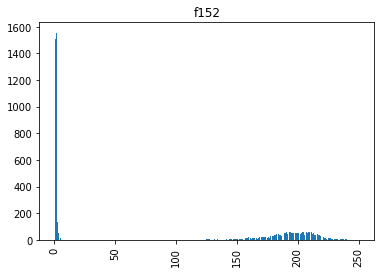

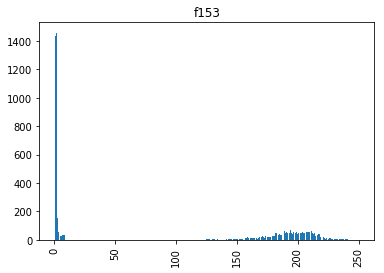

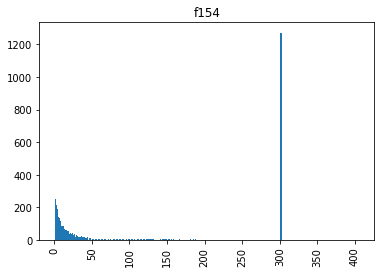

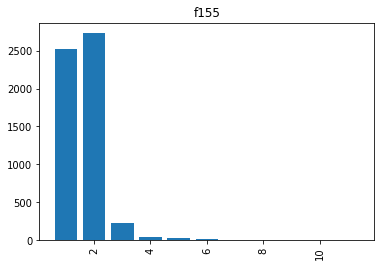

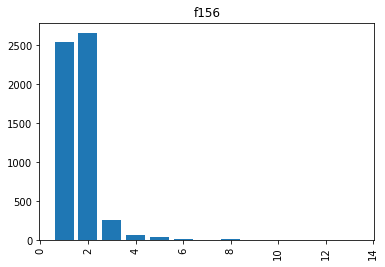

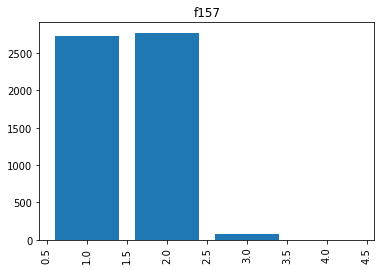

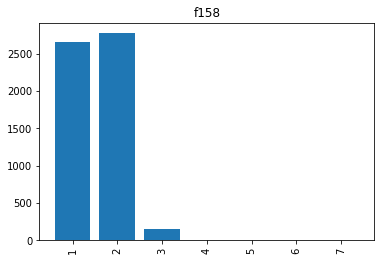

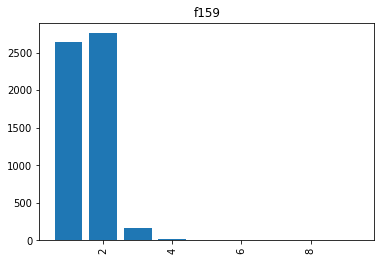

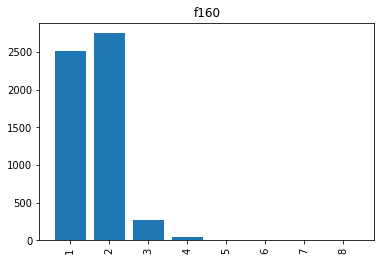

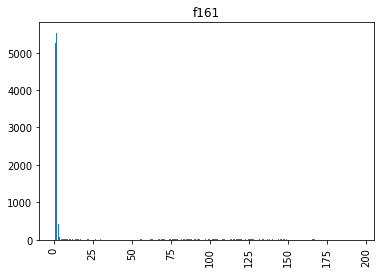

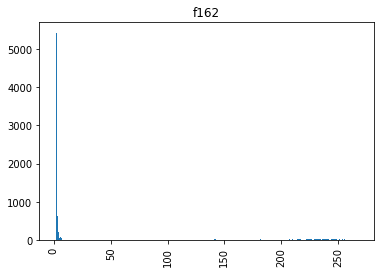

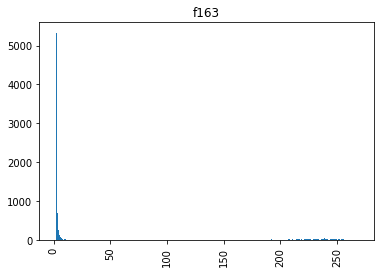

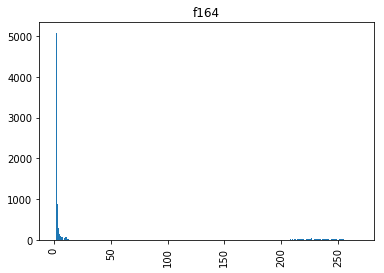

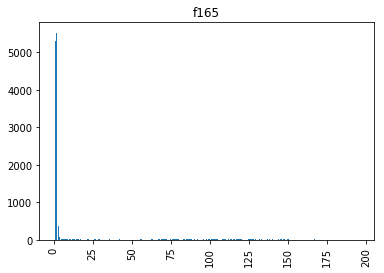

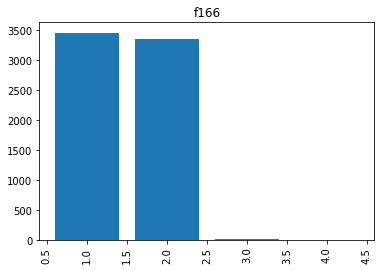

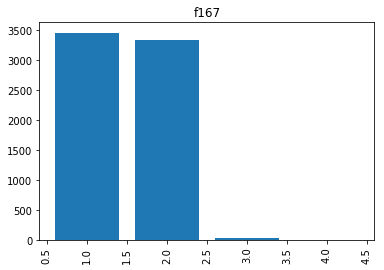

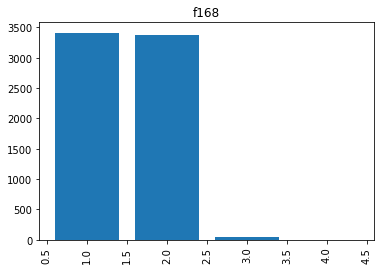

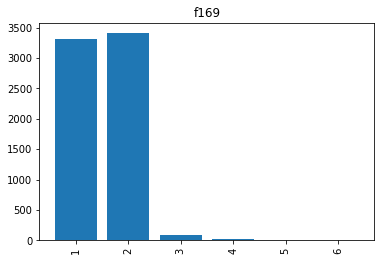

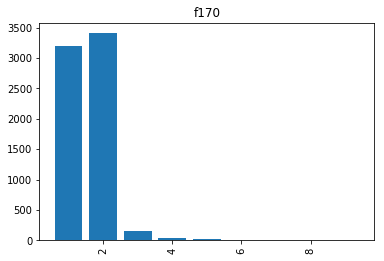

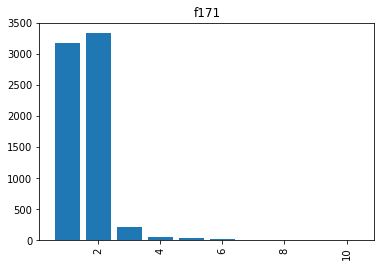

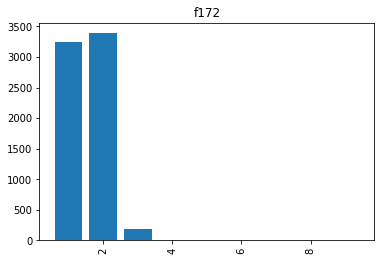

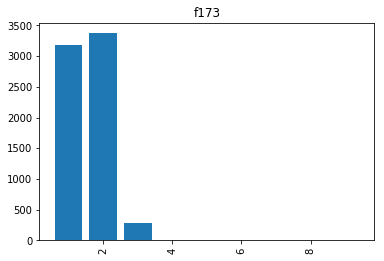

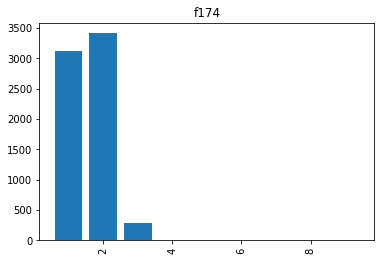

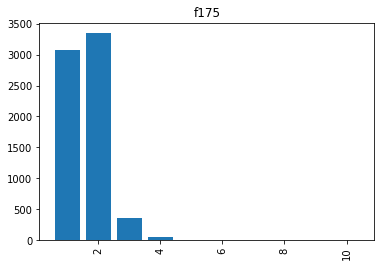

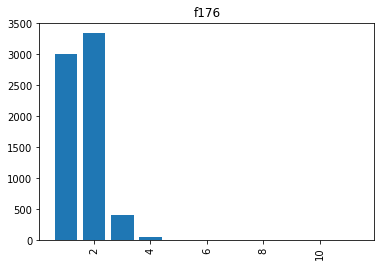

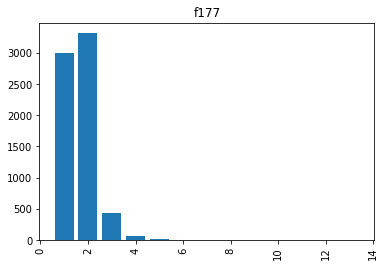

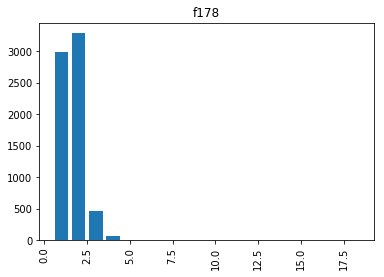

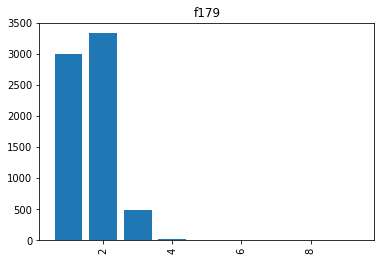

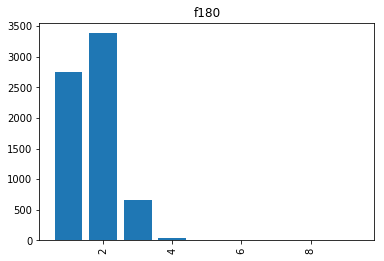

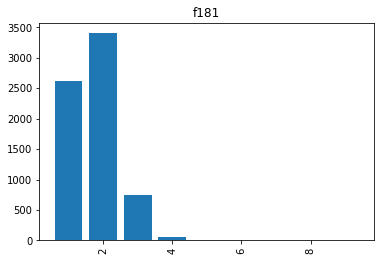

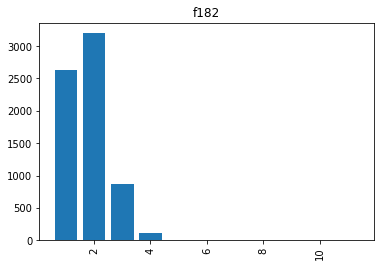

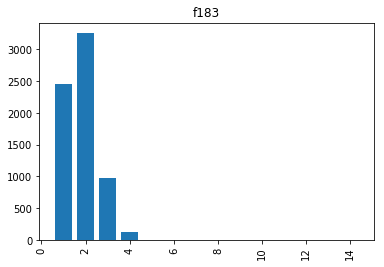

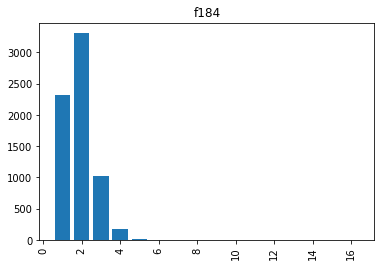

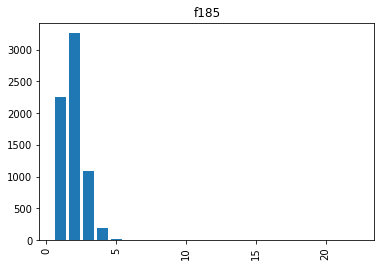

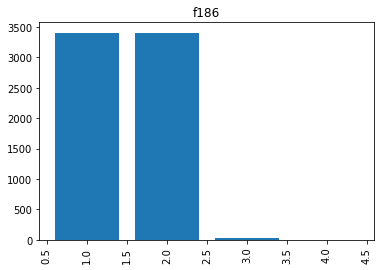

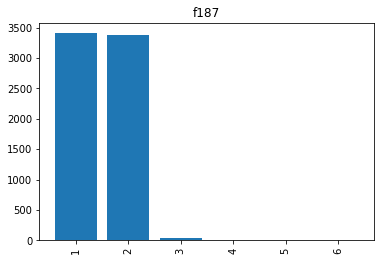

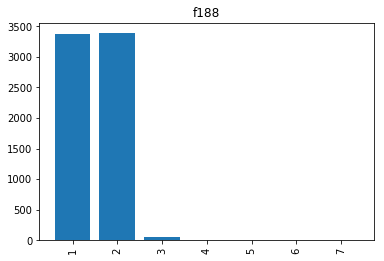

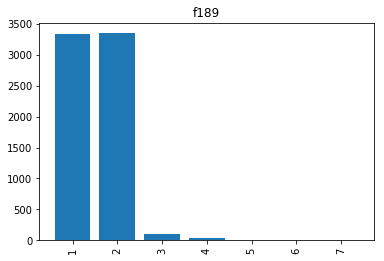

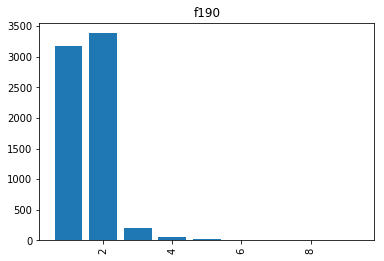

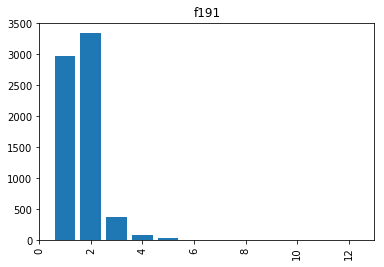

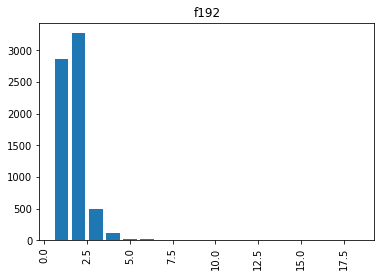

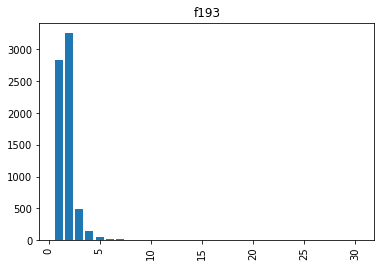

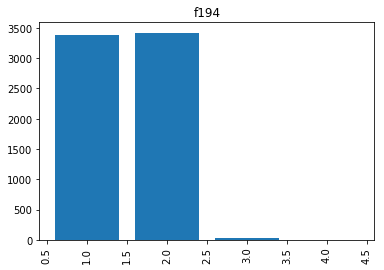

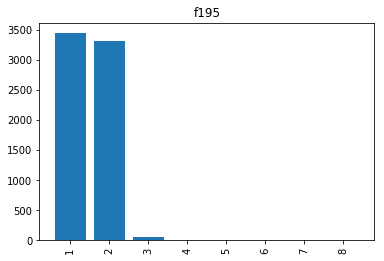

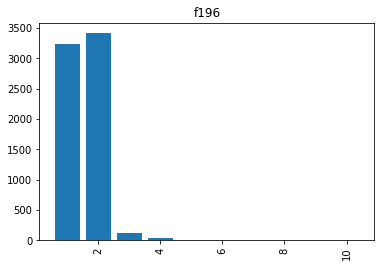

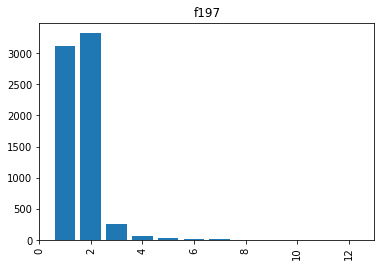

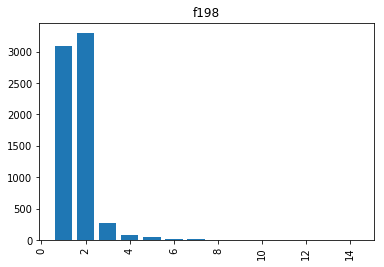

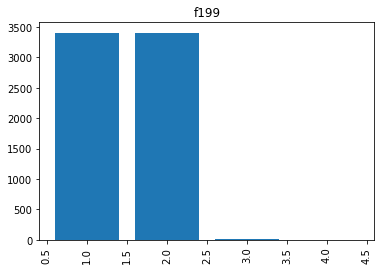

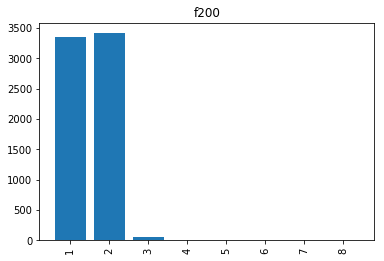

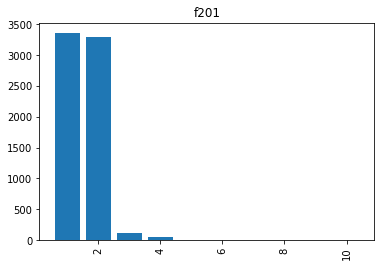

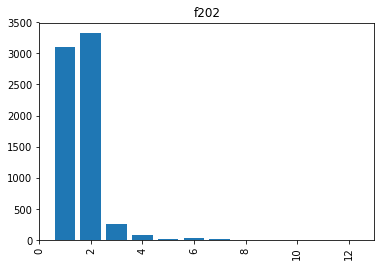

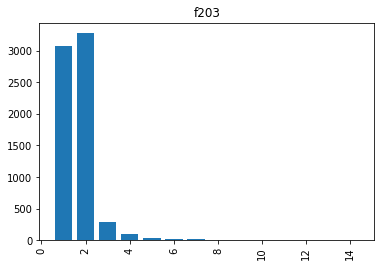

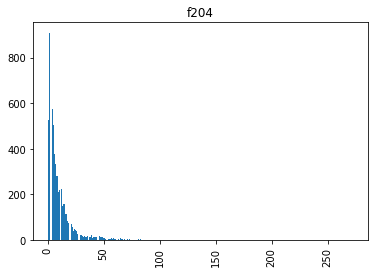

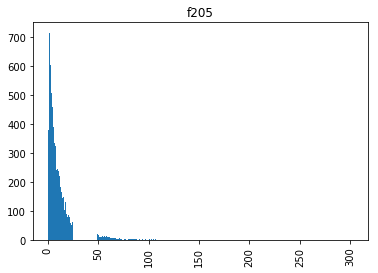

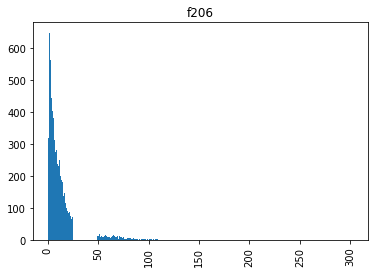

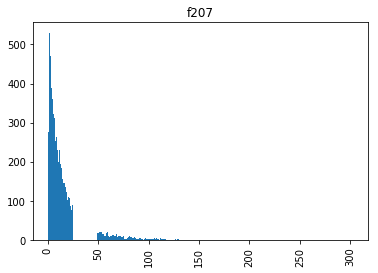

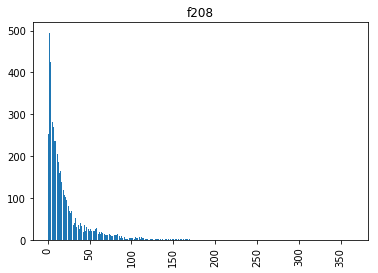

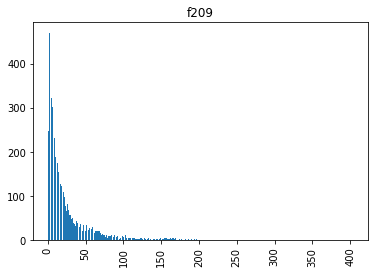

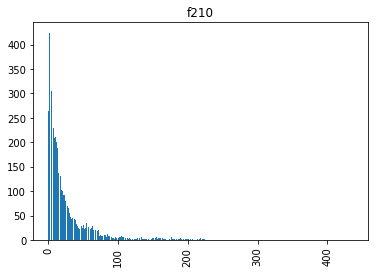

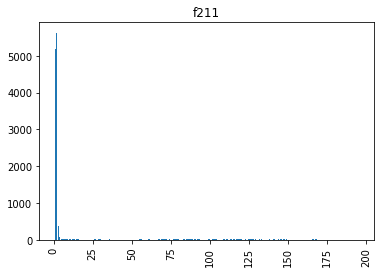

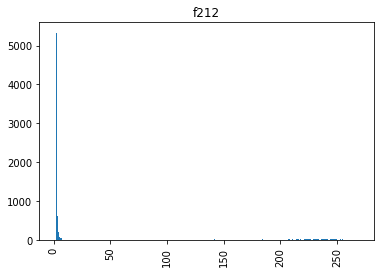

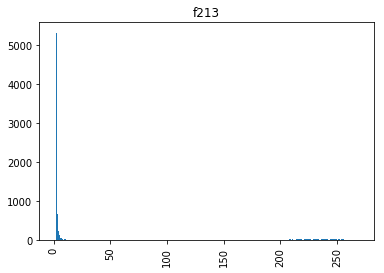

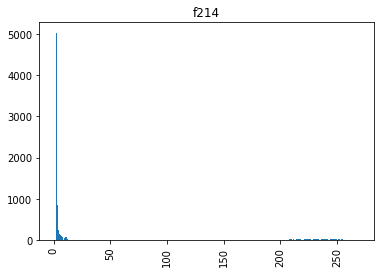

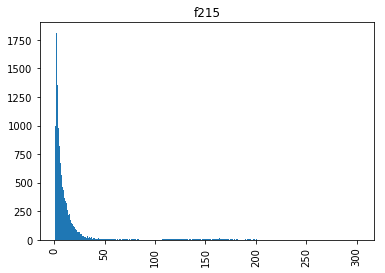

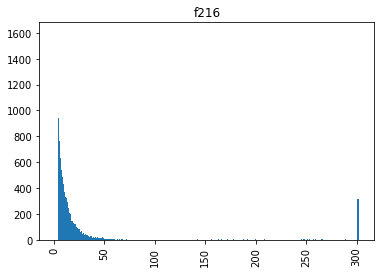

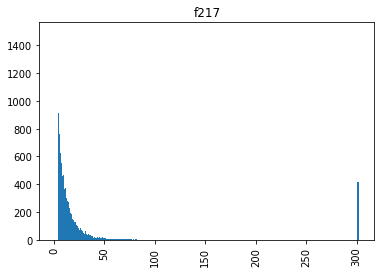

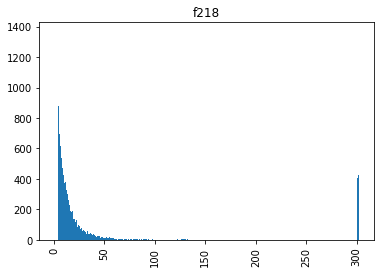

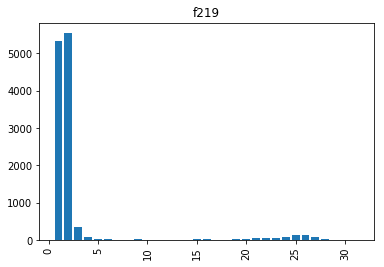

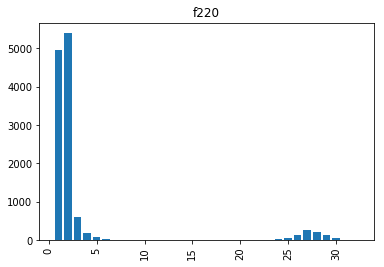

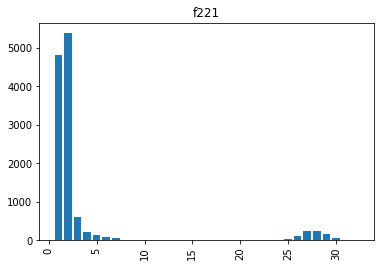

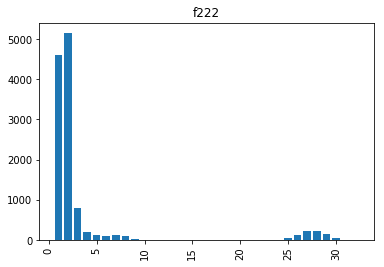

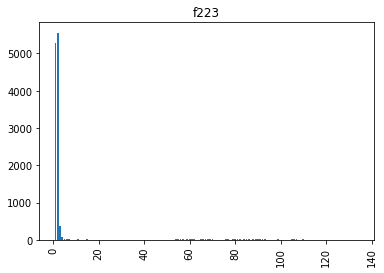

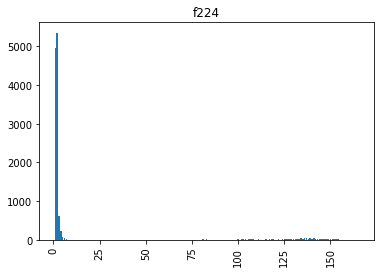

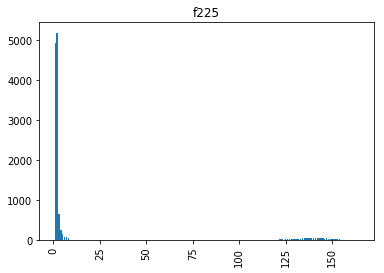

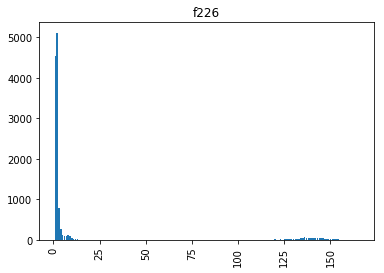

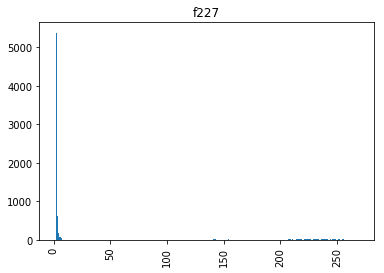

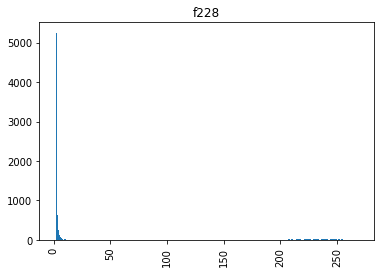

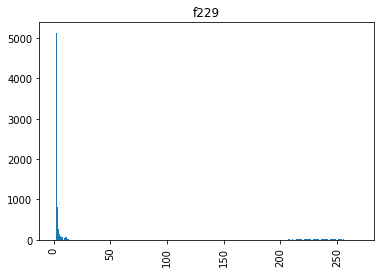

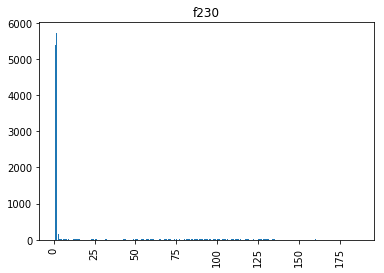

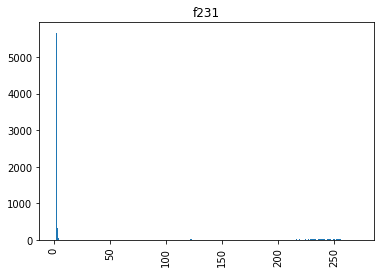

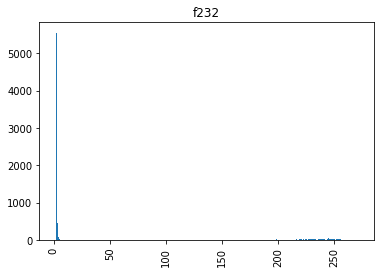

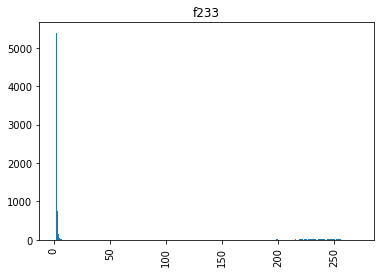

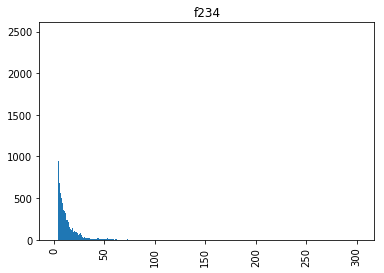

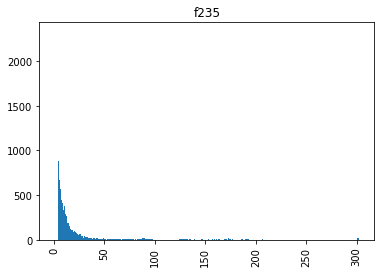

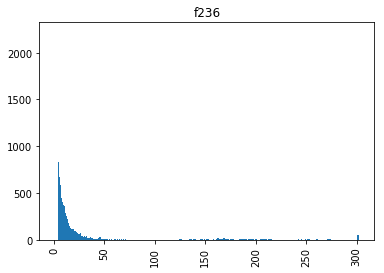

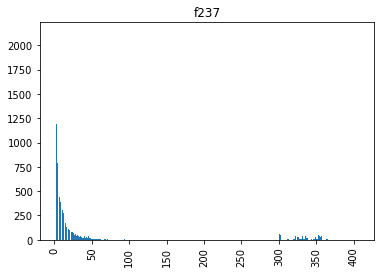

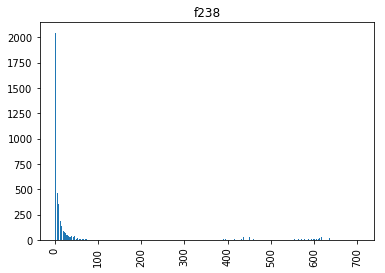

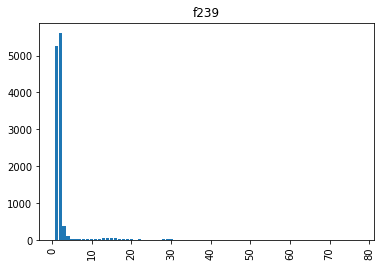

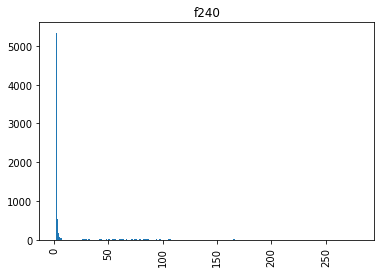

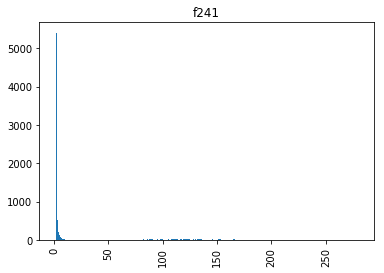

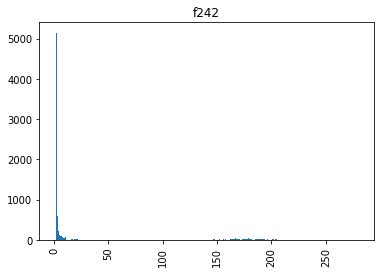

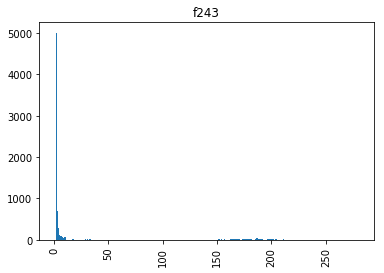

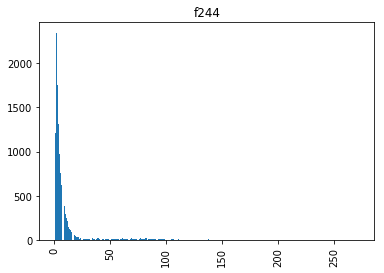

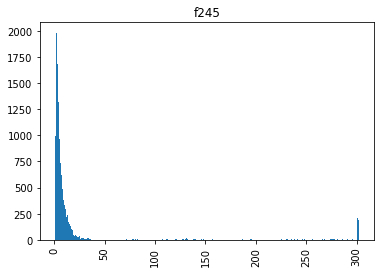

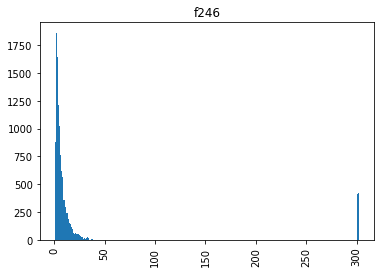

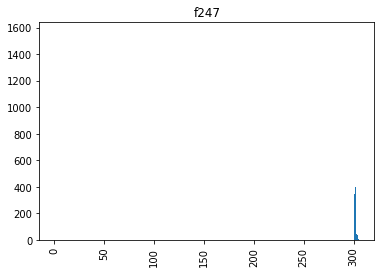

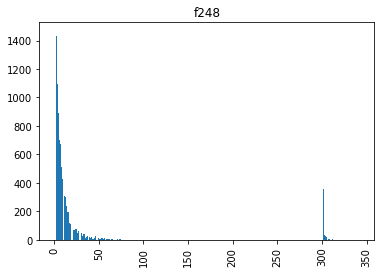

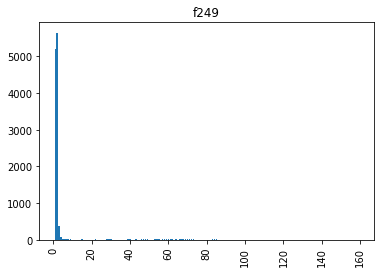

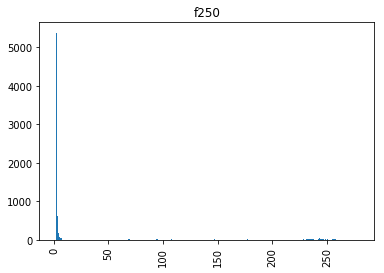

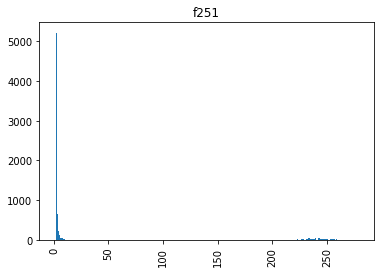

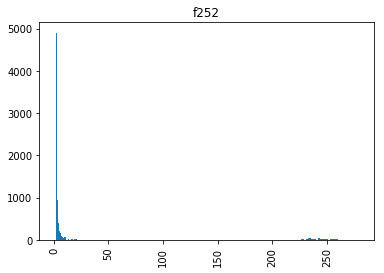

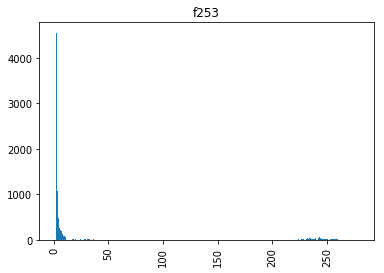

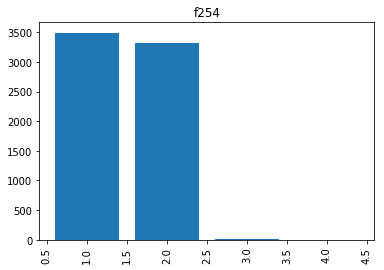

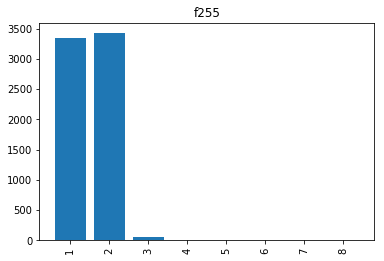

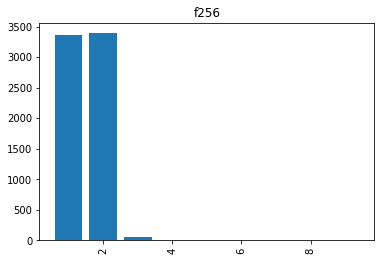

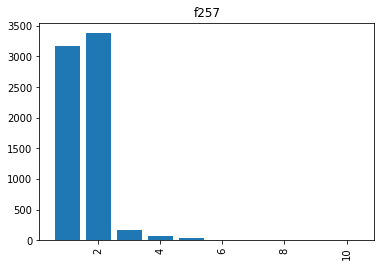

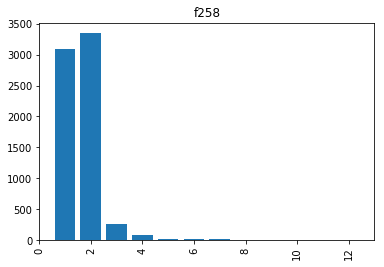

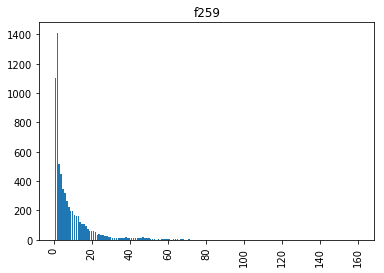

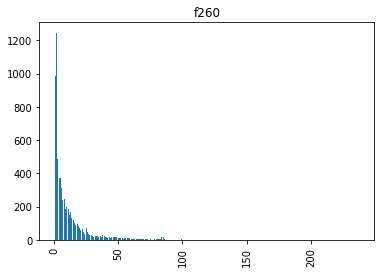

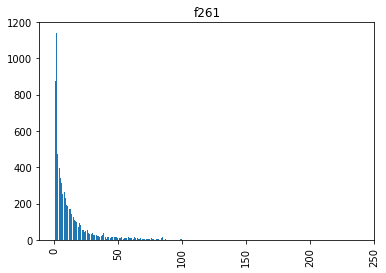

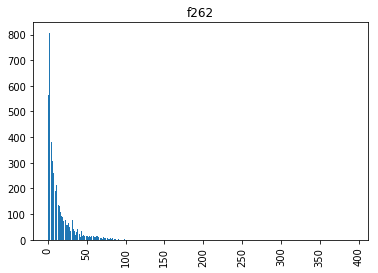

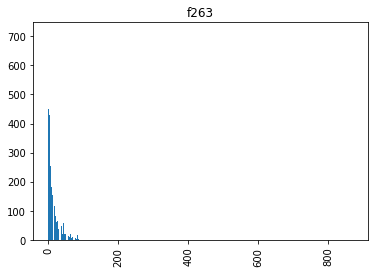

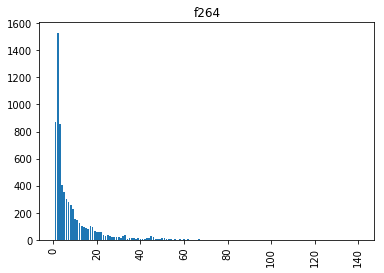

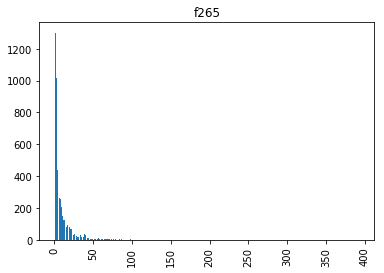

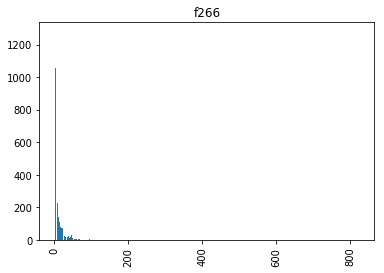

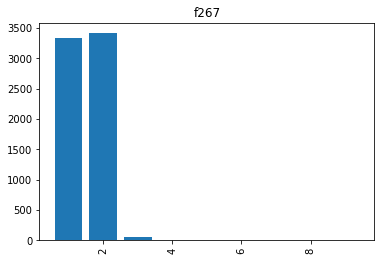

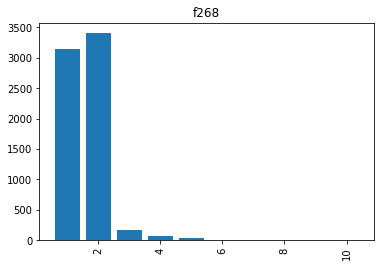

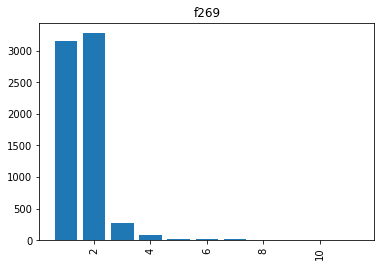

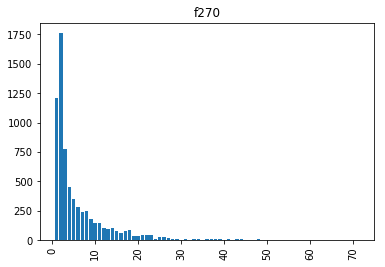

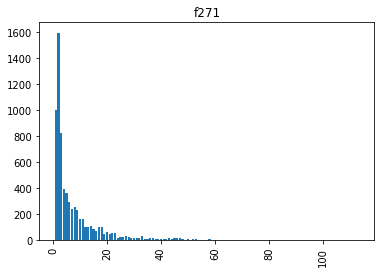

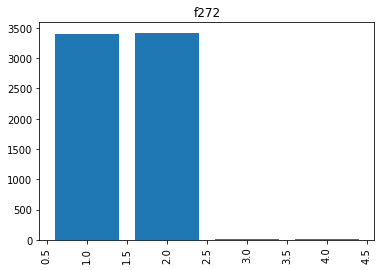

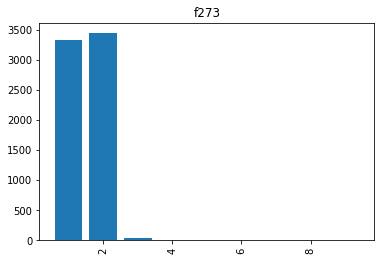

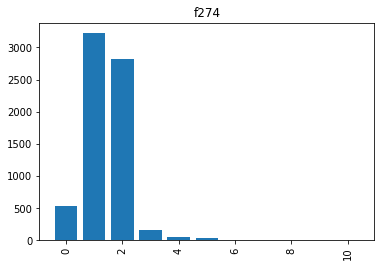

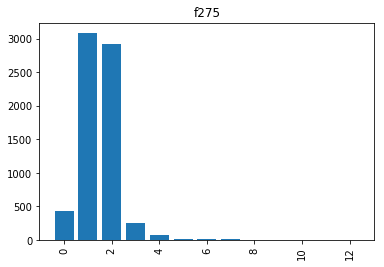

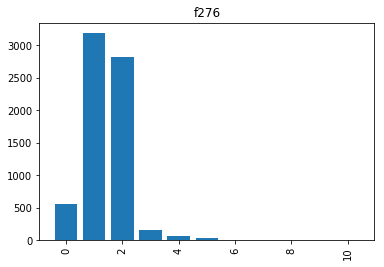

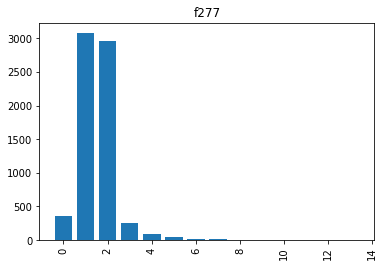

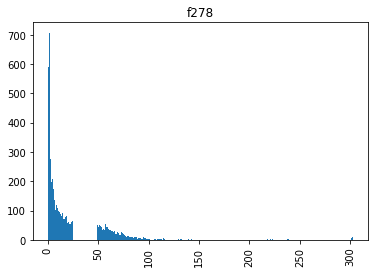

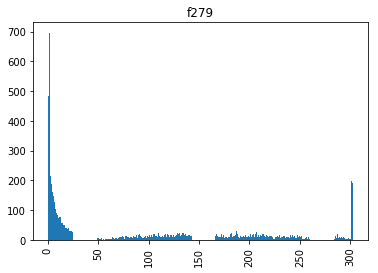

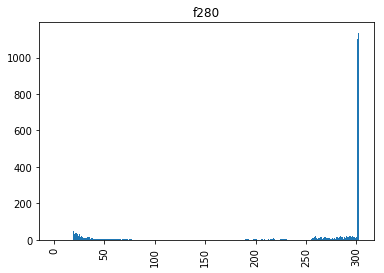

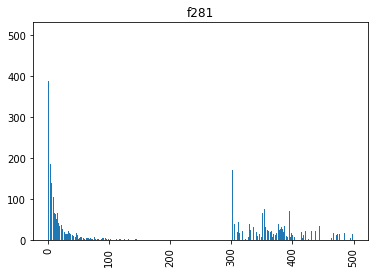

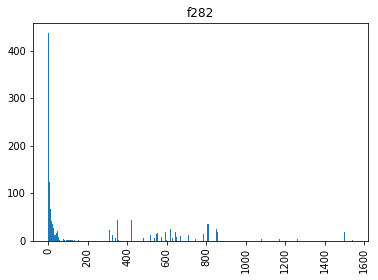

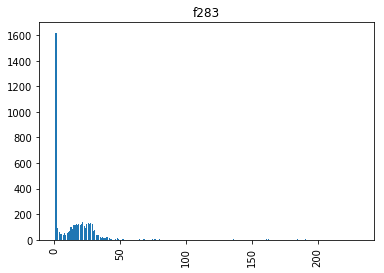

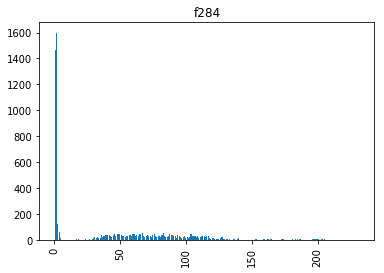

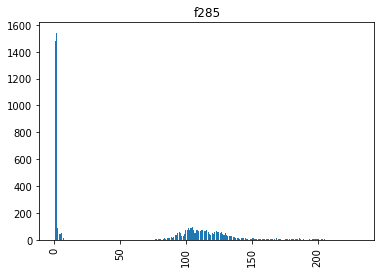

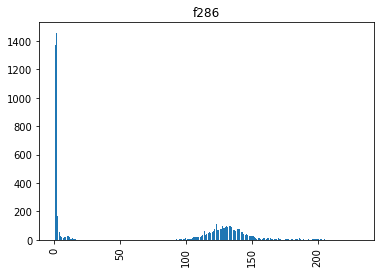

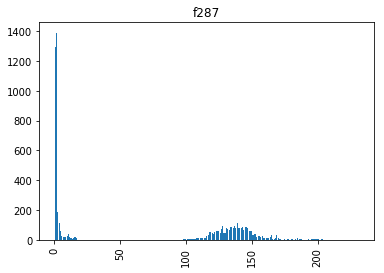

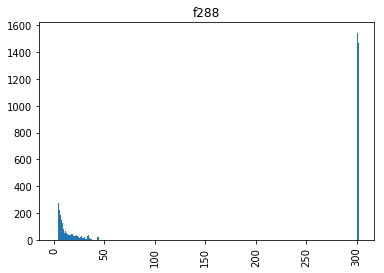

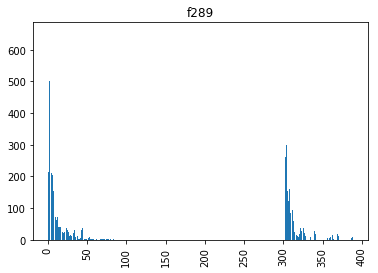

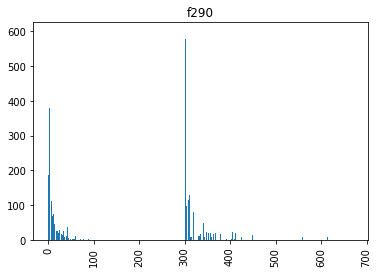

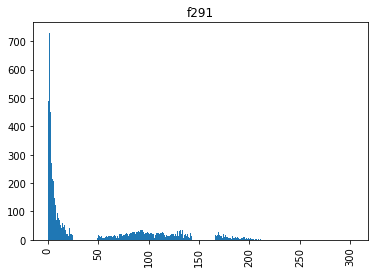

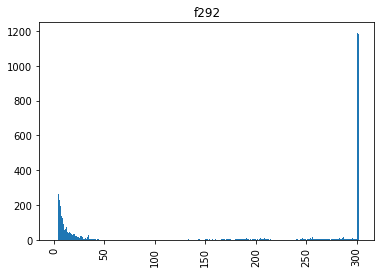

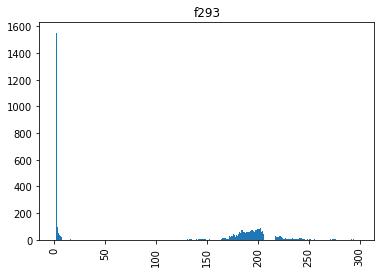

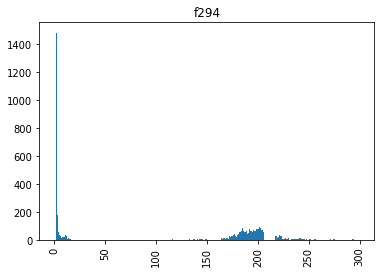

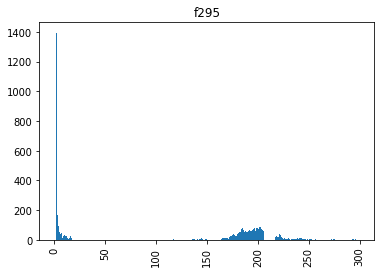

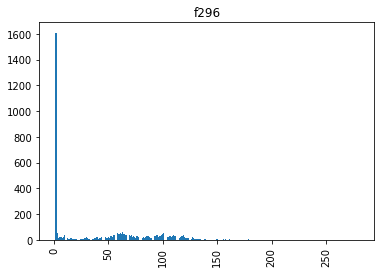

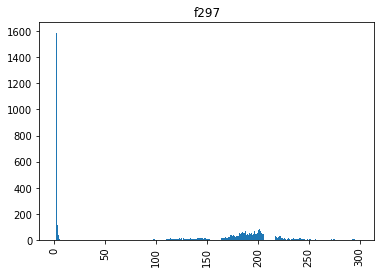

In [15]:
# plot risk distribution
import matplotlib.pyplot as plt
for title,series in feature_distribution_plot_list:
    # preprocess sereis
    series = series.sort_index()
    if len(series.index)>1000:
        mi = series.index.min()
        ma = series.index.max()+1
        new_index = series.index.to_series().apply(lambda x:index2range(x,mi,ma,10))
        series = series.groupby(new_index).sum().sort_values()
    sereis = series.sort_values()
    plt.bar(series.index,series)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

In [5]:
import pickle
with open("risk_distribution_ratio.dat","rb") as f:
    feature_distribution_ratio_plot_list=pickle.load(f)

In [6]:
feature_distribution_ratio_plot_list[2][1]

f3
0    0.007765
1    0.012314
2    0.029265
Name: label, dtype: float64

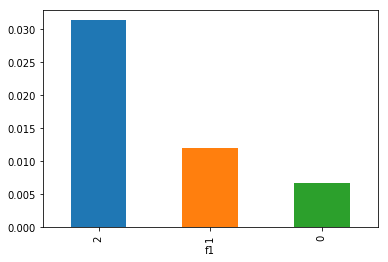

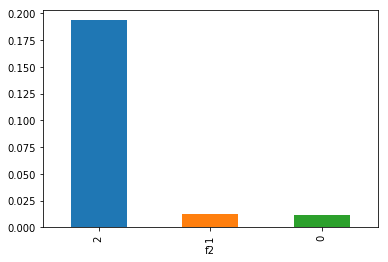

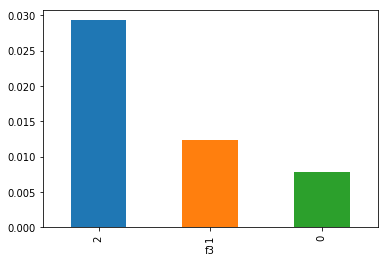

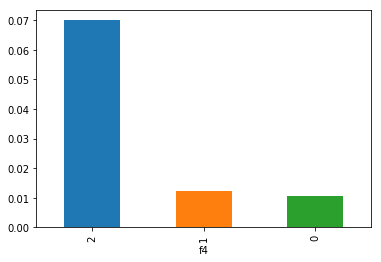

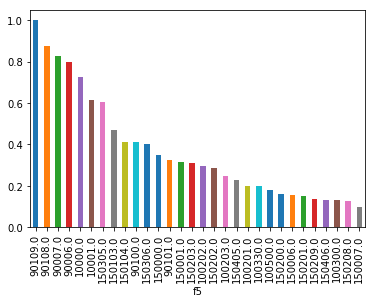

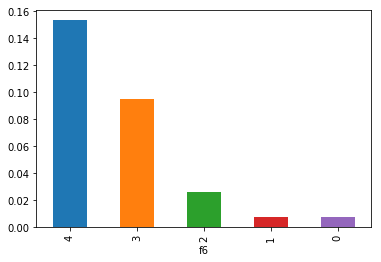

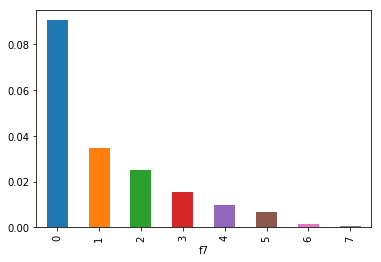

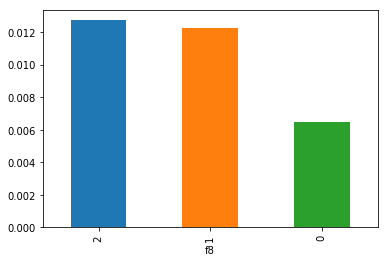

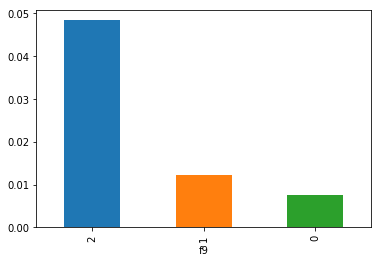

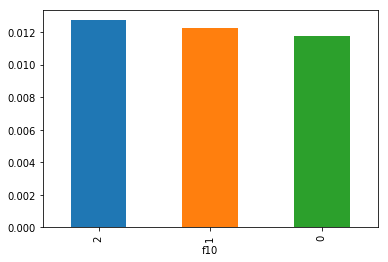

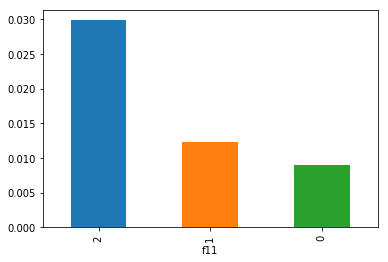

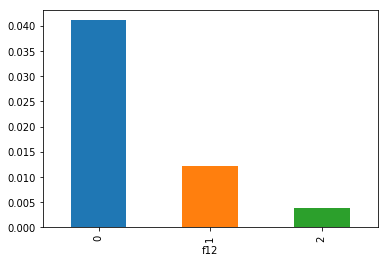

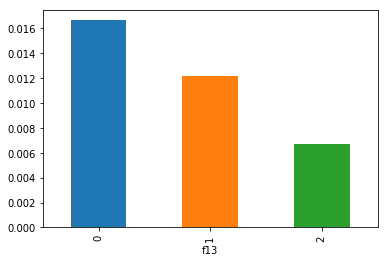

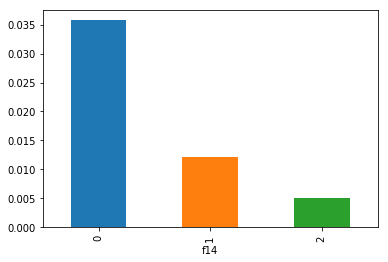

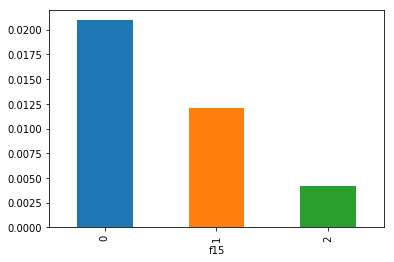

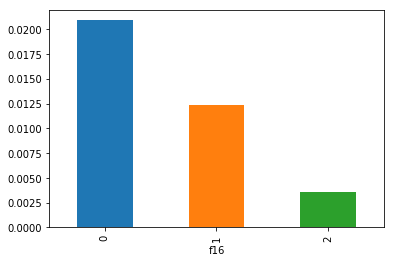

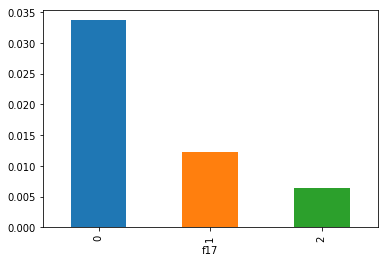

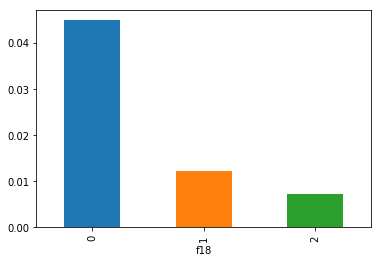

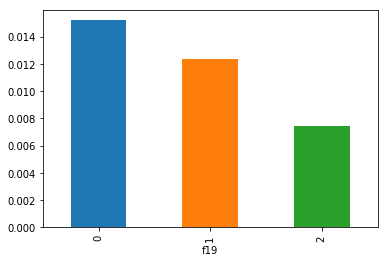

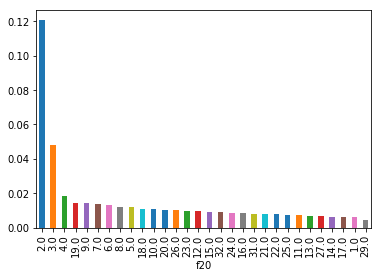

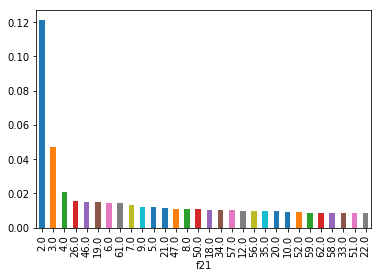

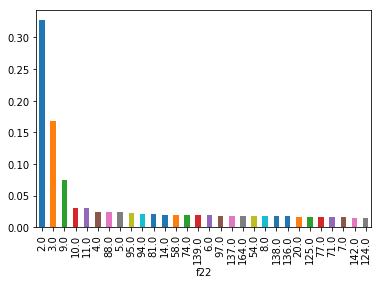

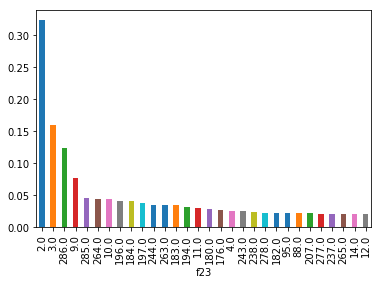

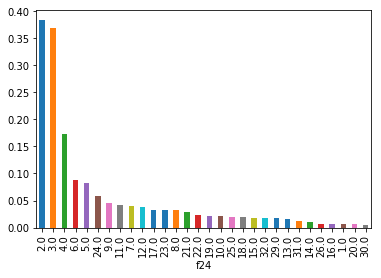

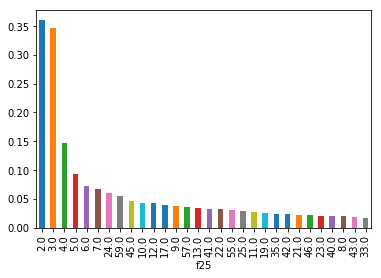

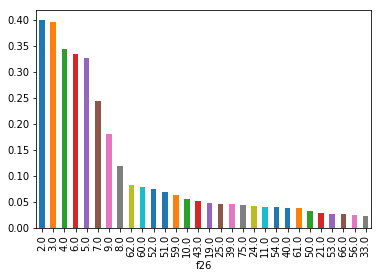

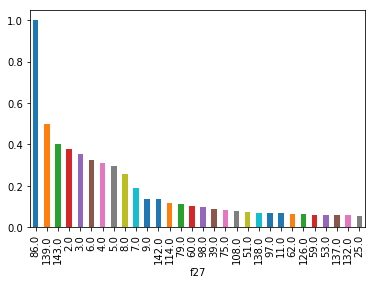

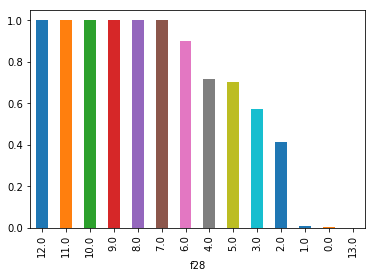

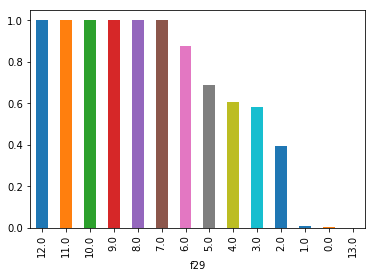

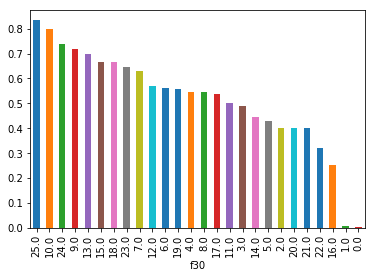

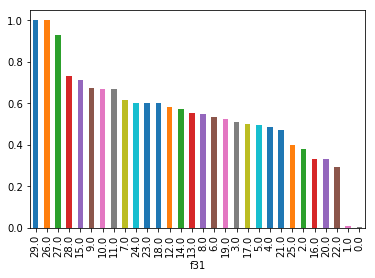

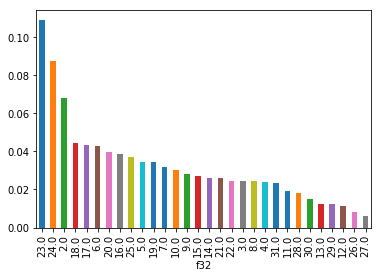

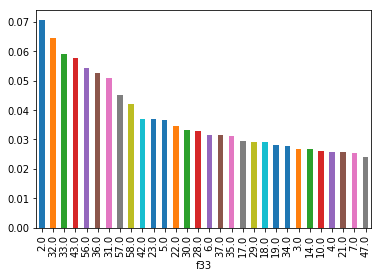

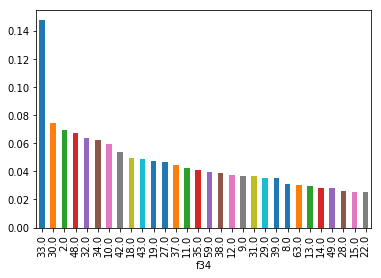

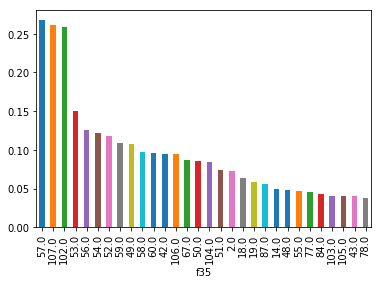

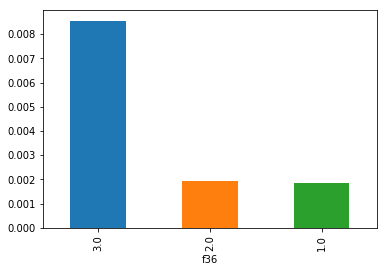

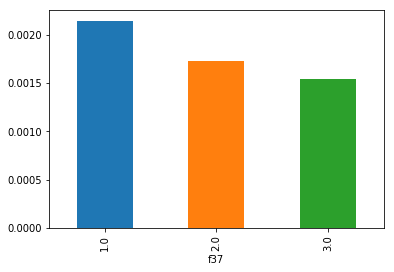

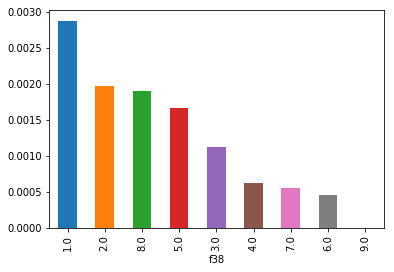

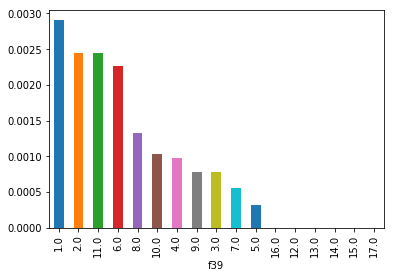

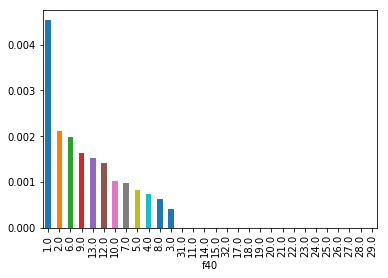

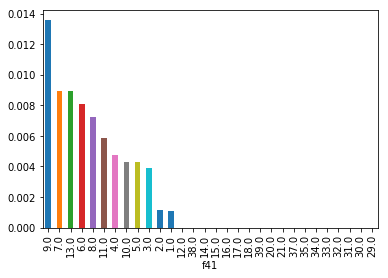

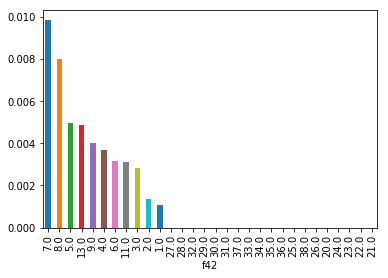

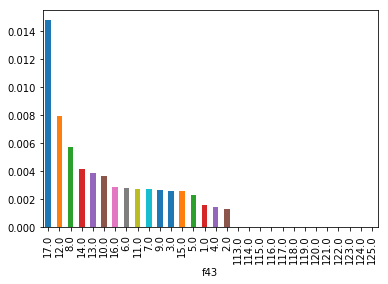

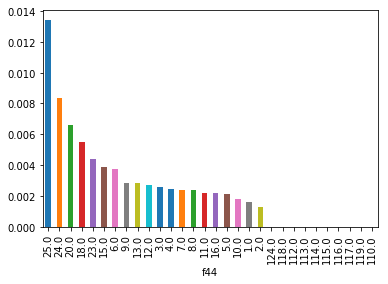

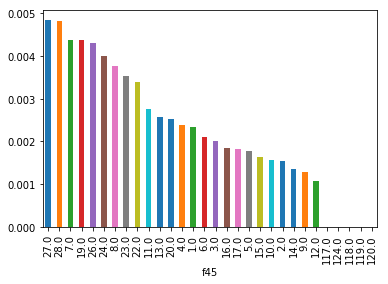

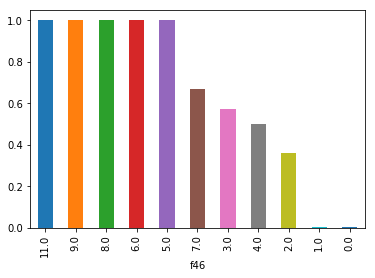

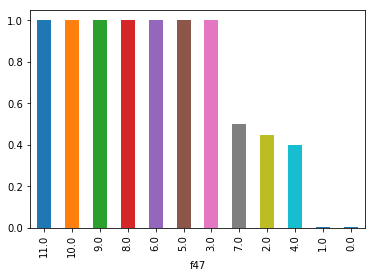

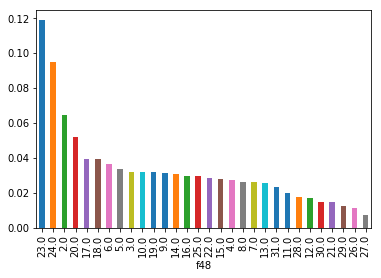

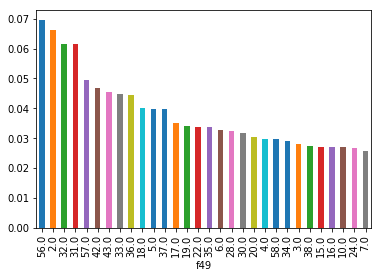

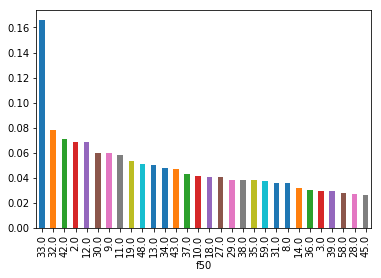

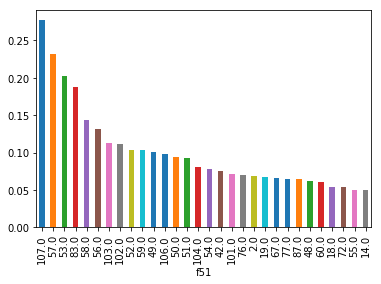

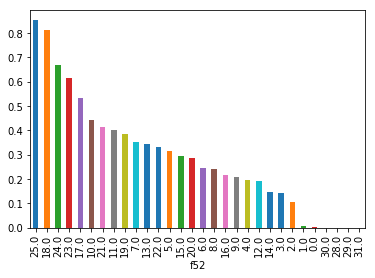

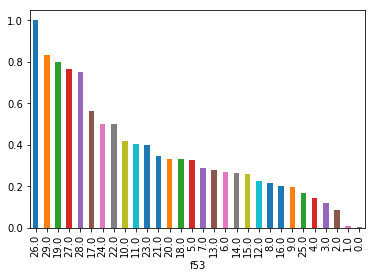

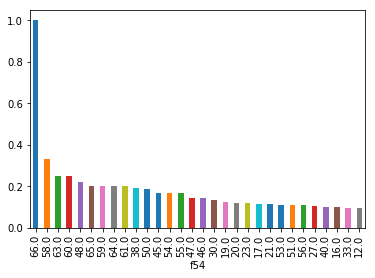

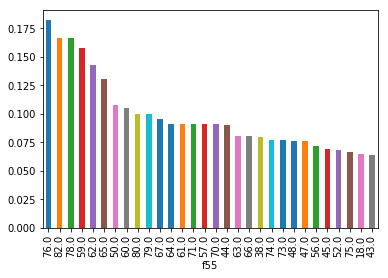

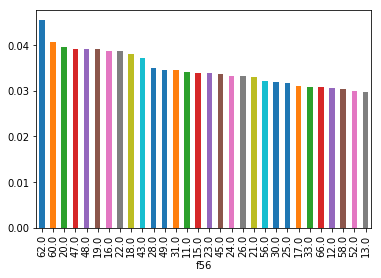

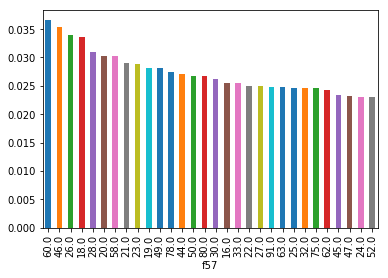

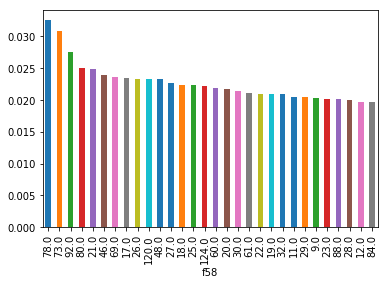

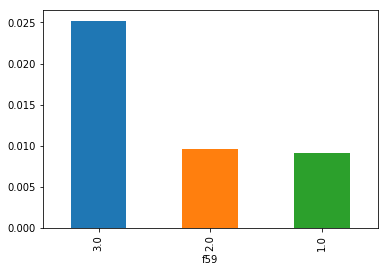

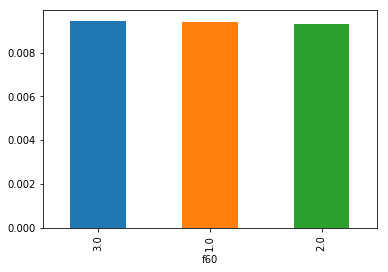

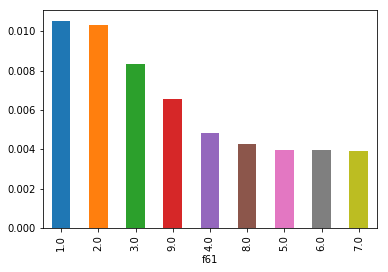

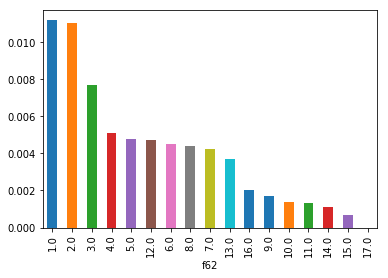

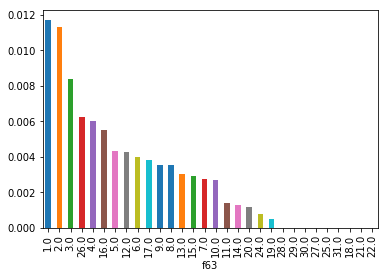

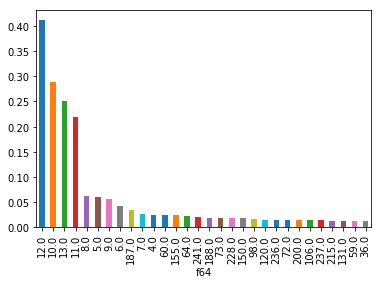

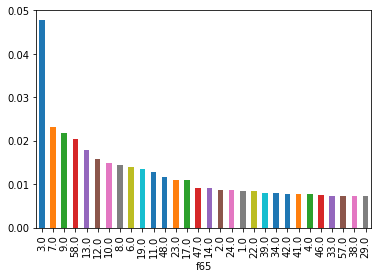

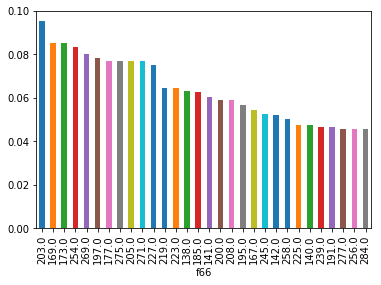

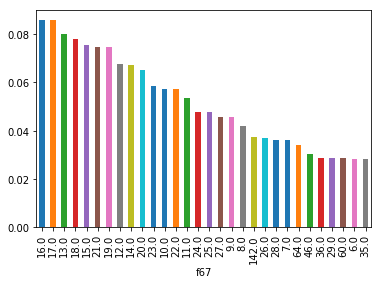

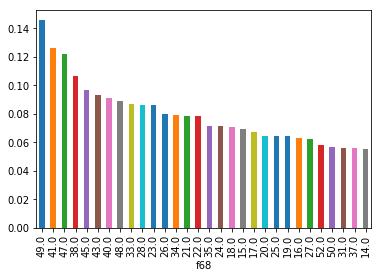

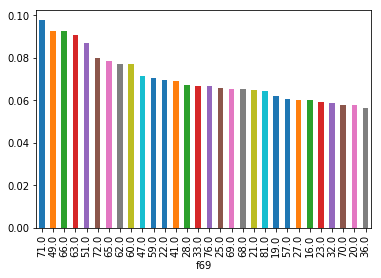

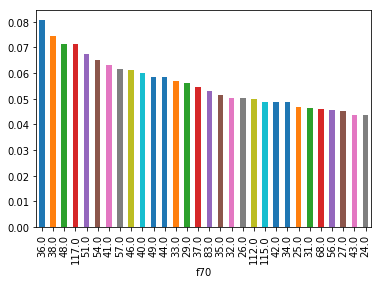

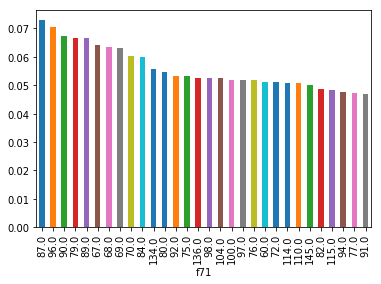

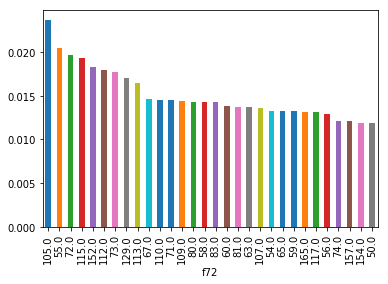

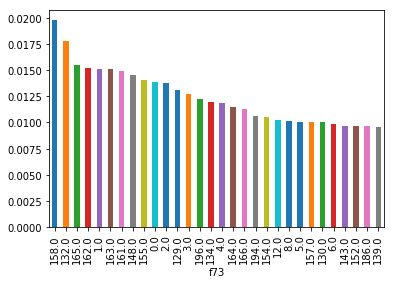

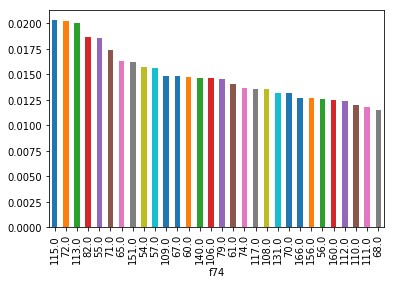

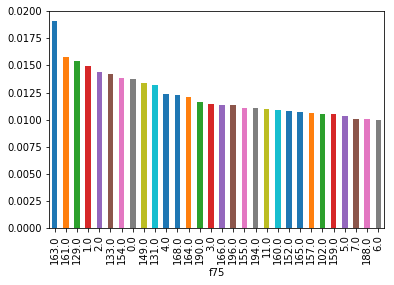

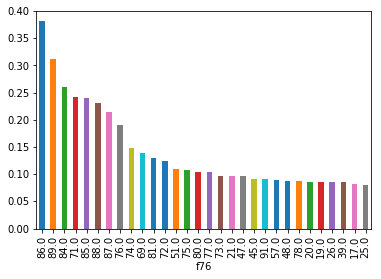

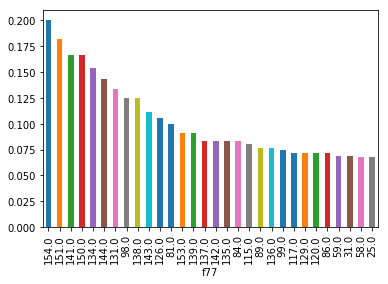

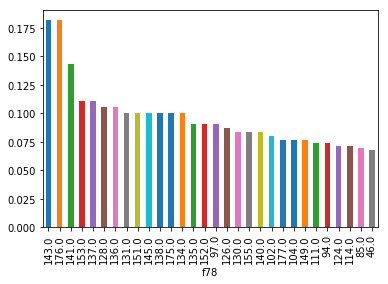

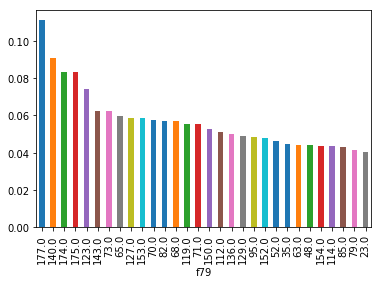

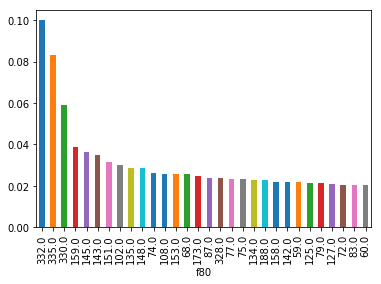

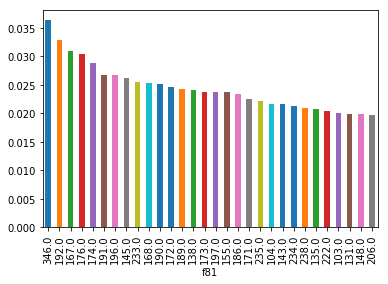

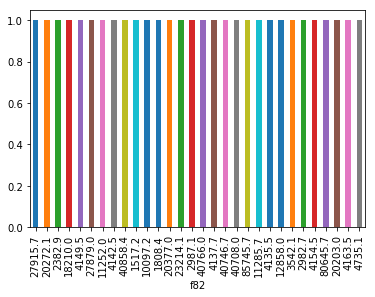

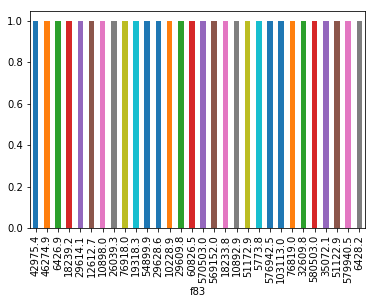

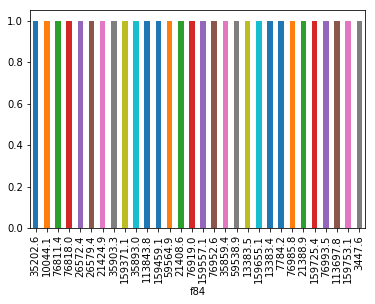

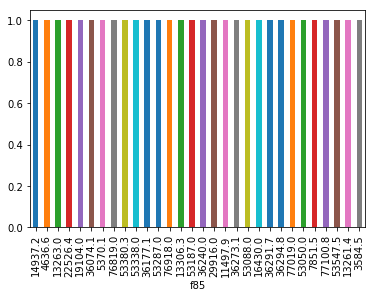

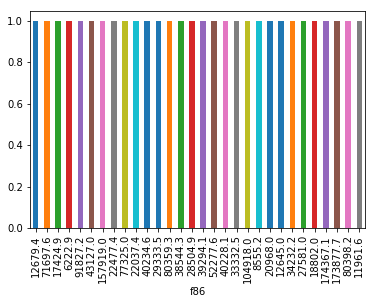

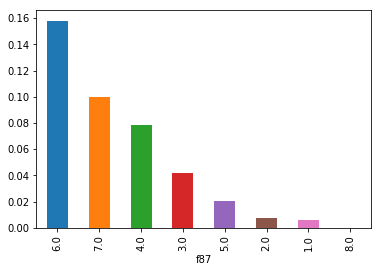

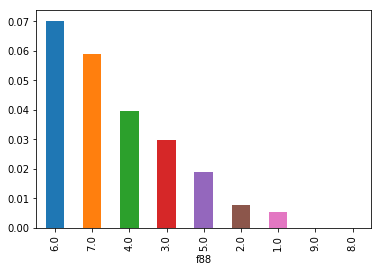

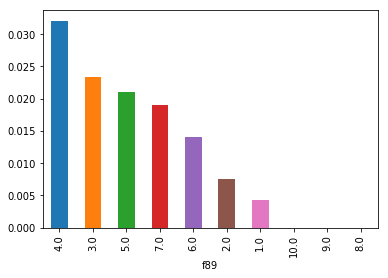

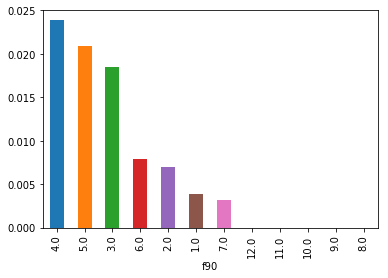

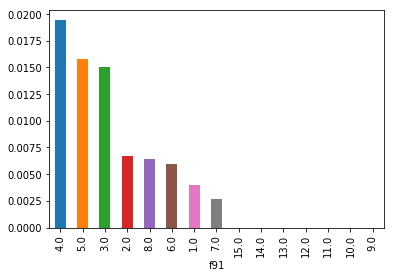

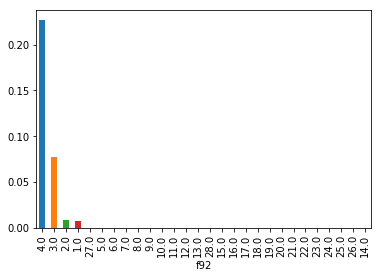

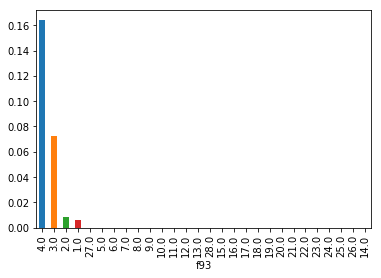

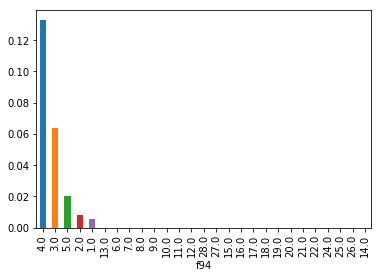

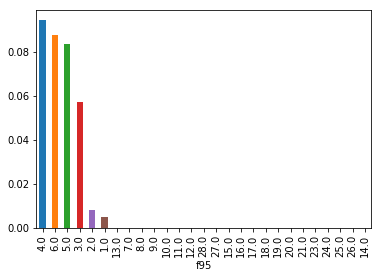

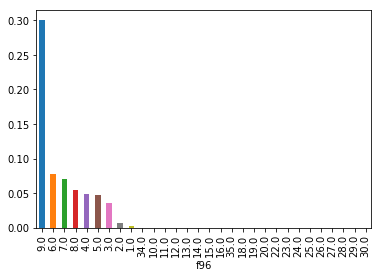

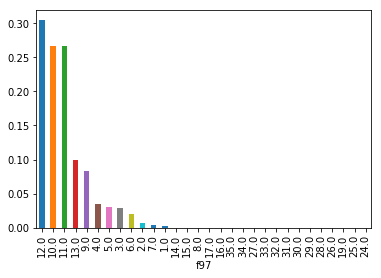

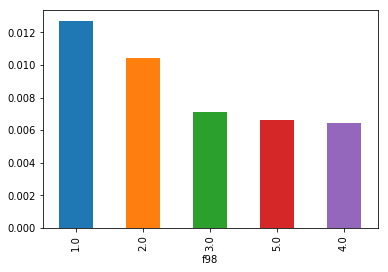

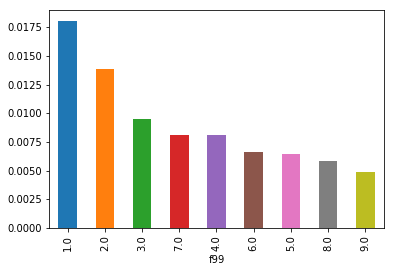

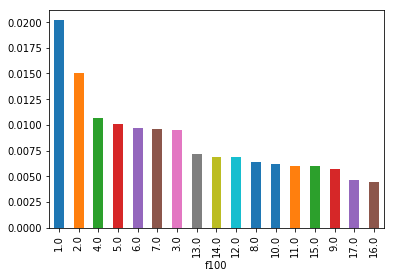

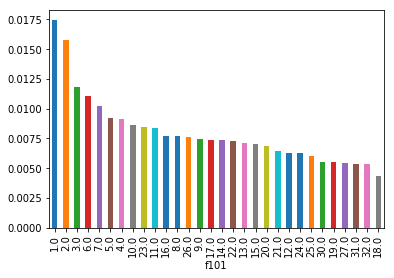

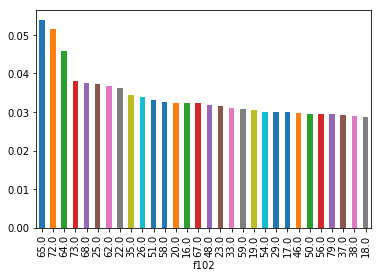

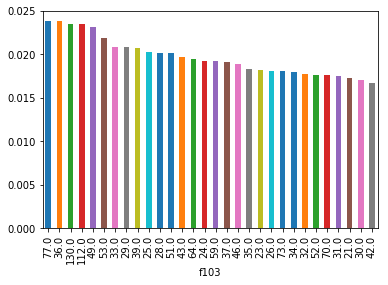

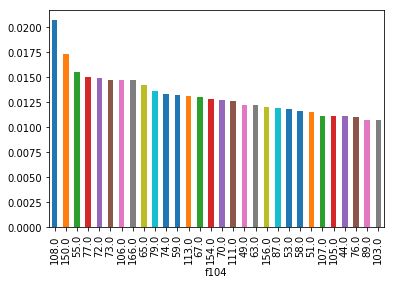

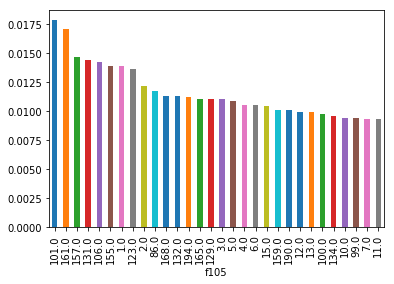

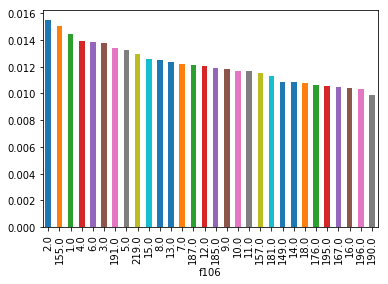

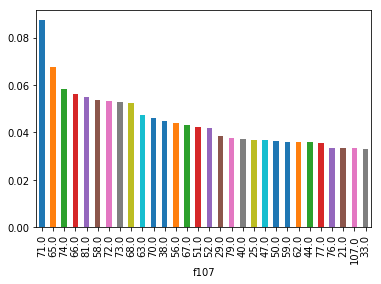

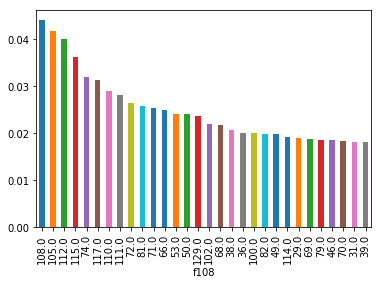

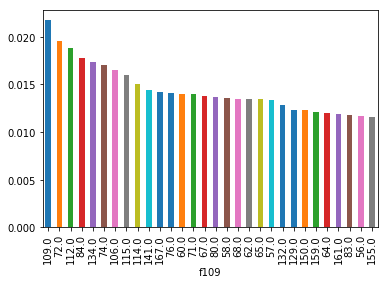

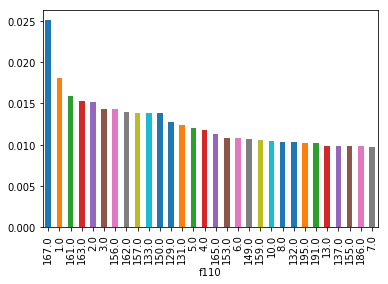

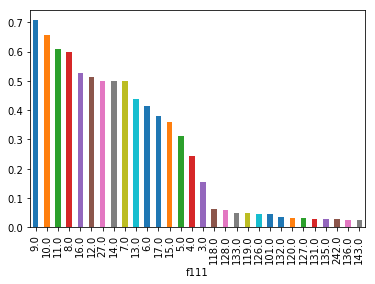

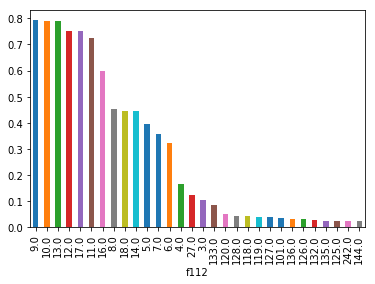

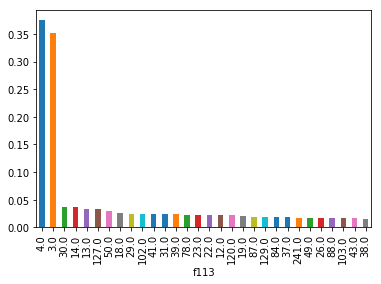

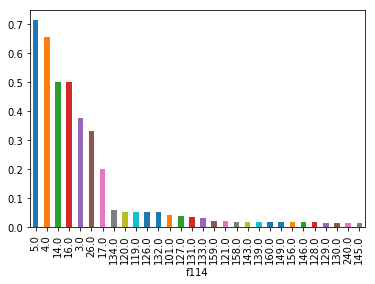

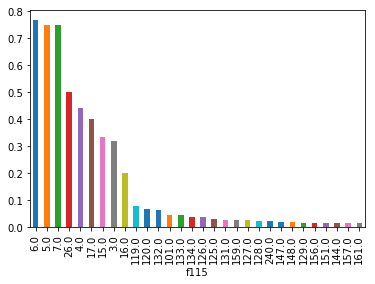

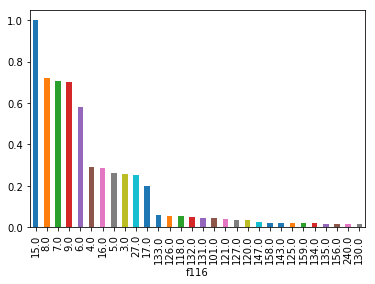

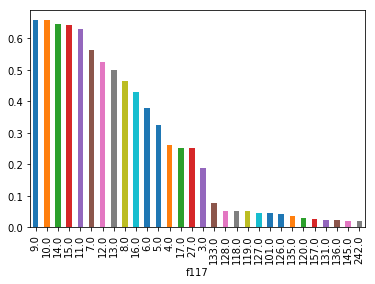

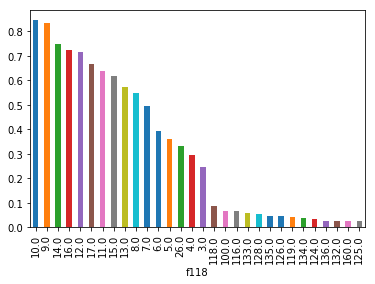

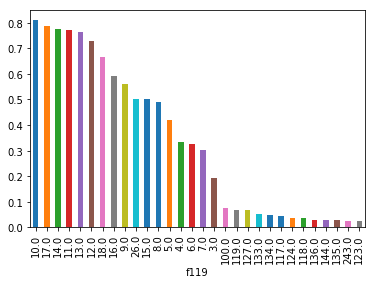

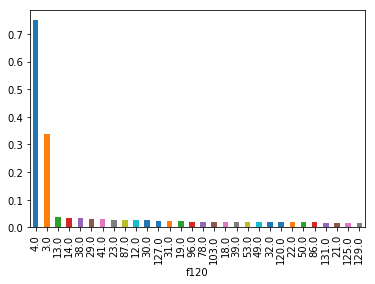

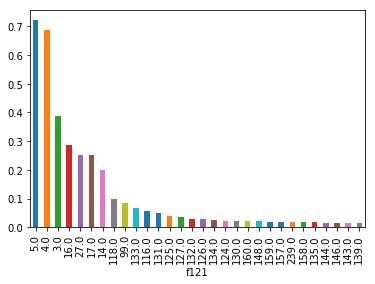

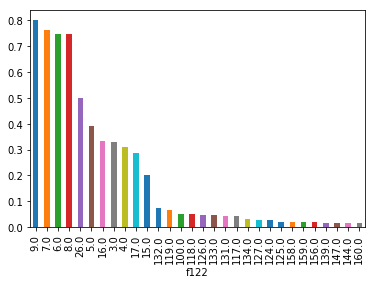

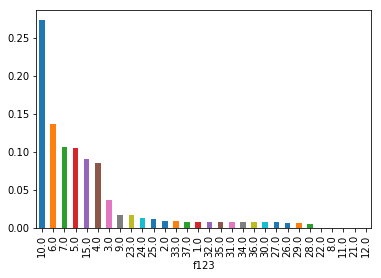

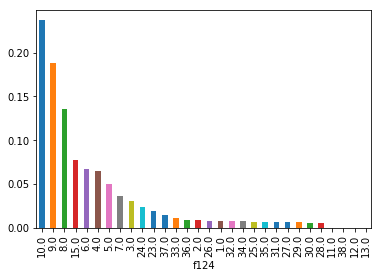

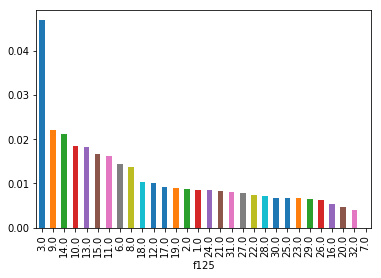

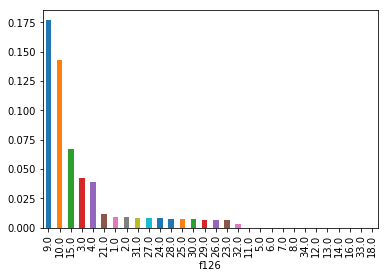

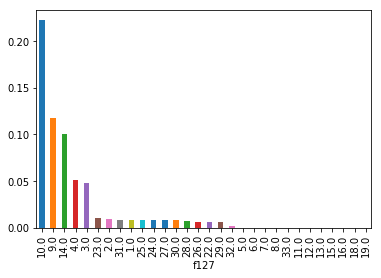

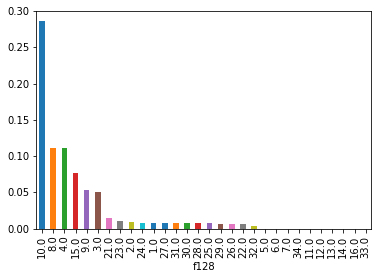

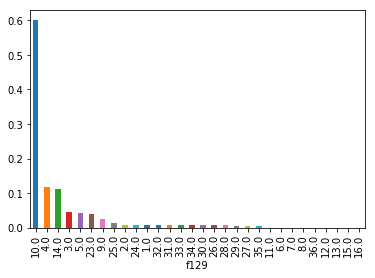

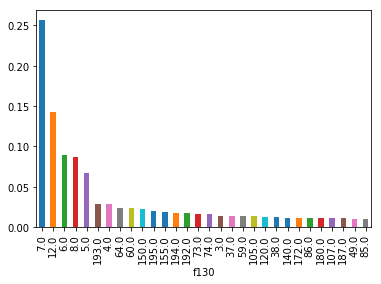

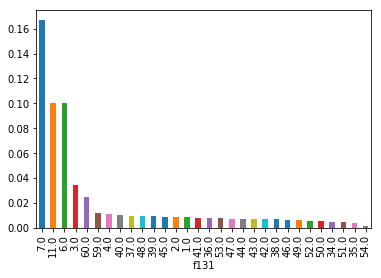

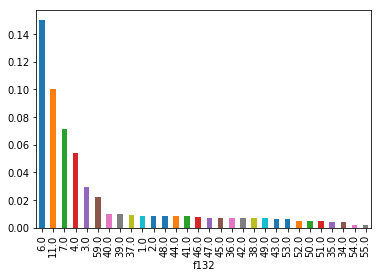

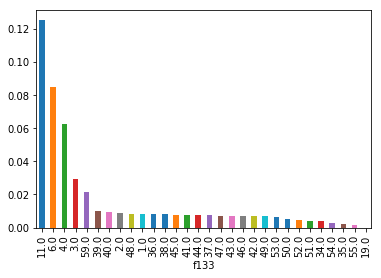

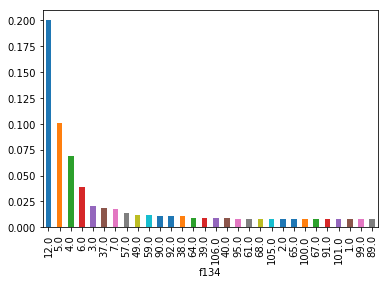

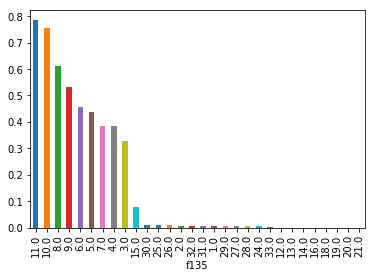

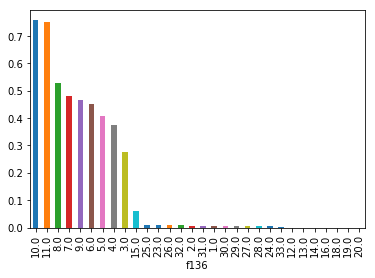

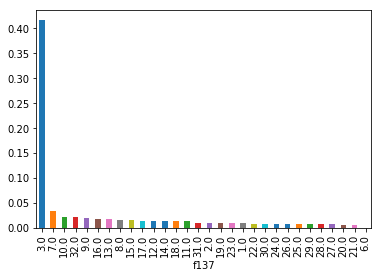

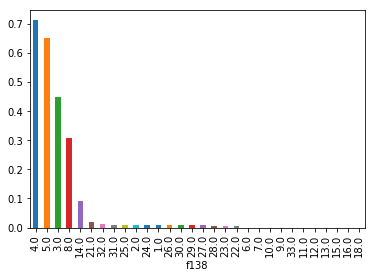

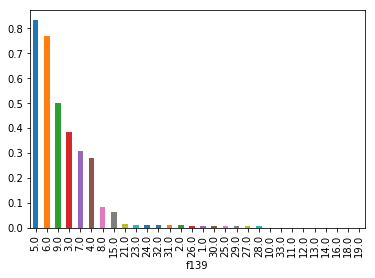

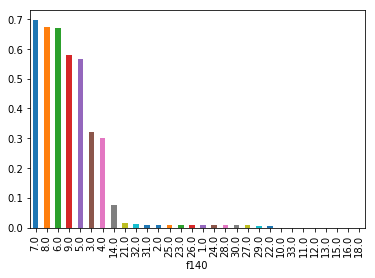

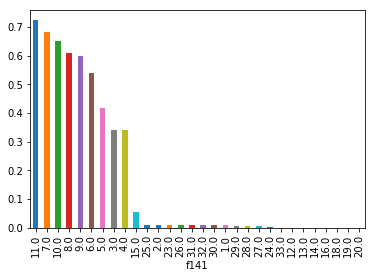

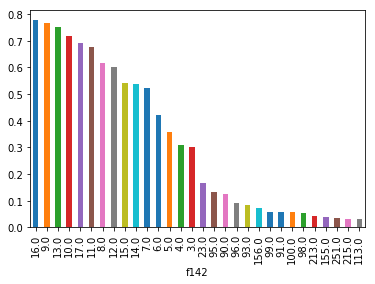

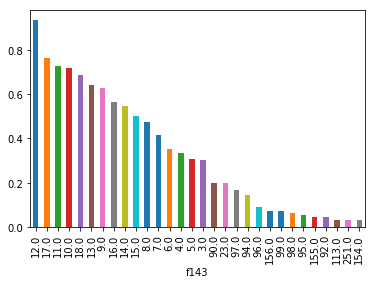

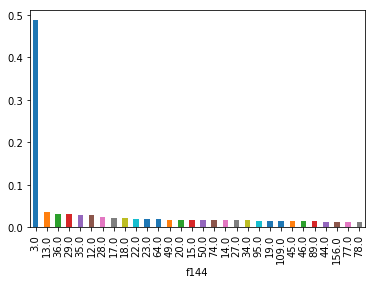

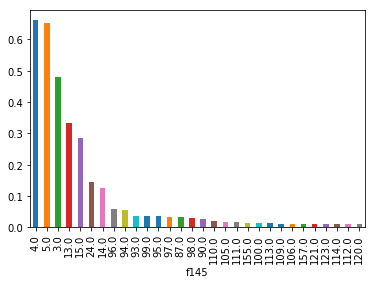

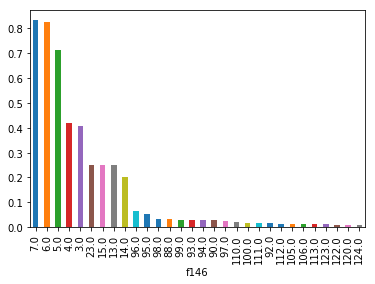

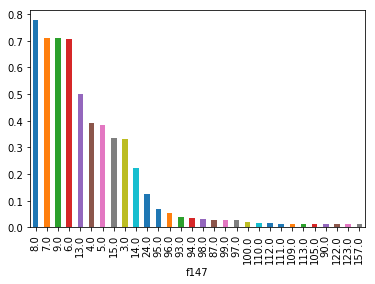

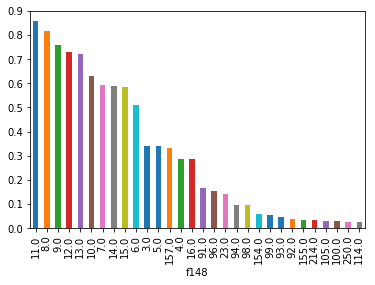

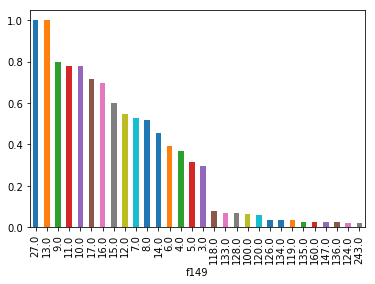

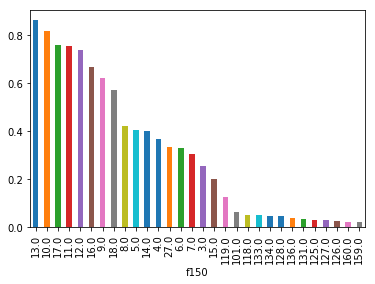

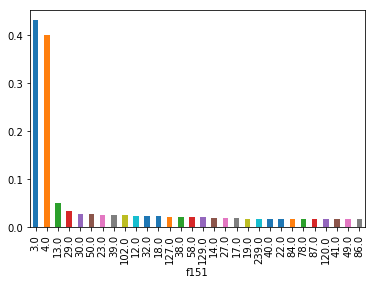

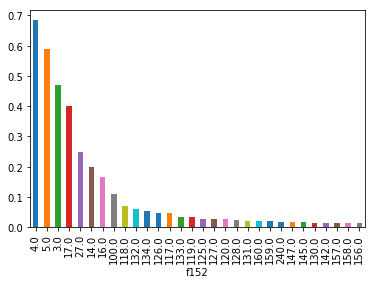

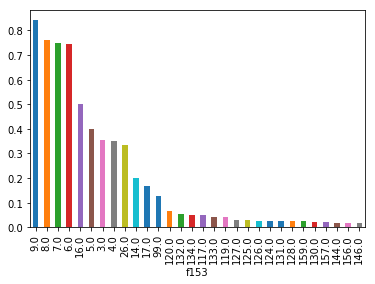

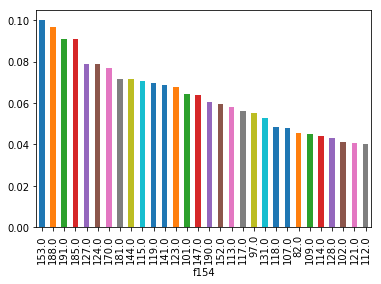

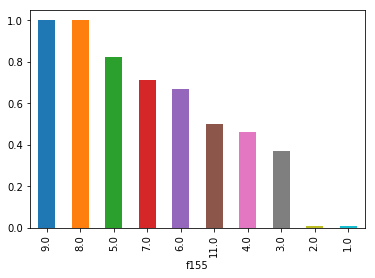

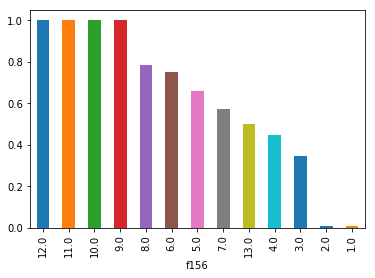

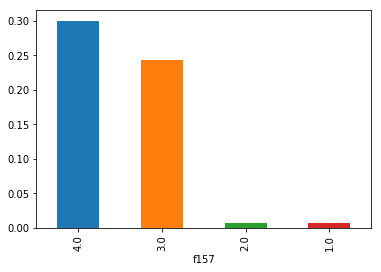

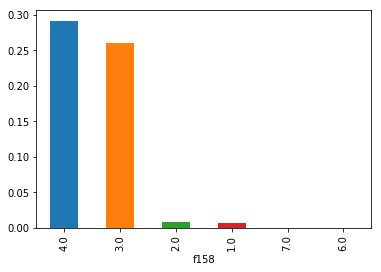

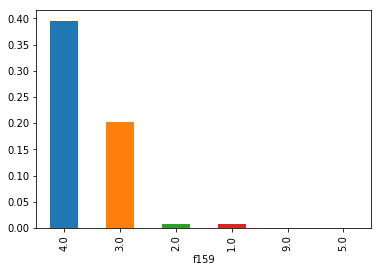

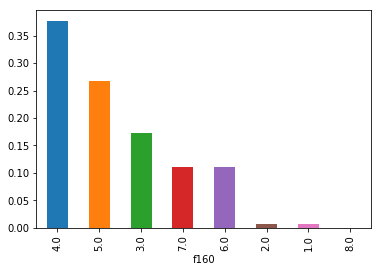

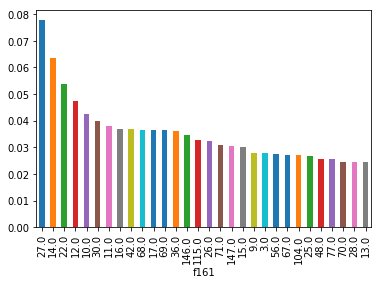

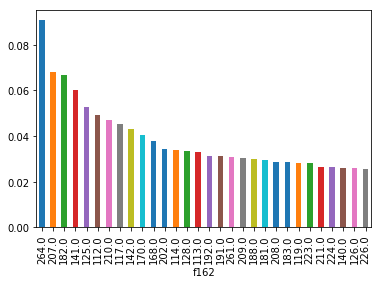

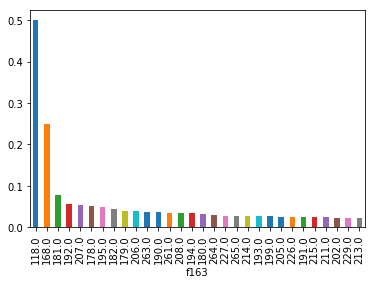

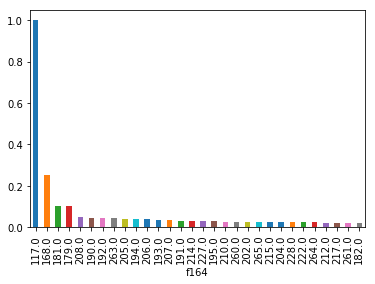

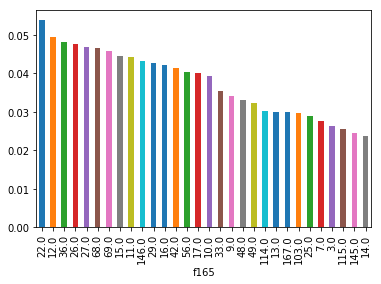

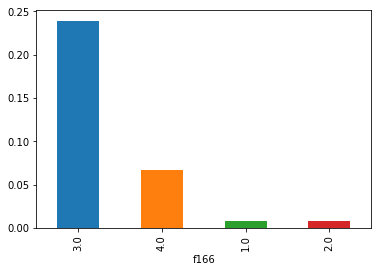

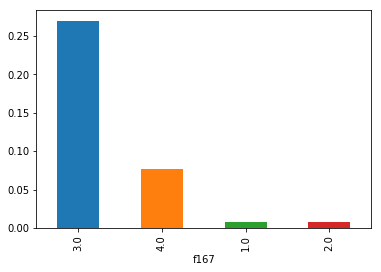

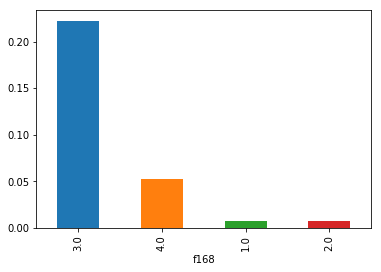

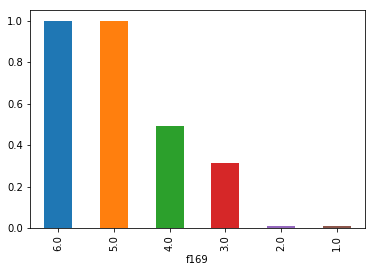

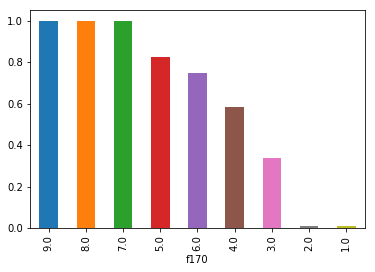

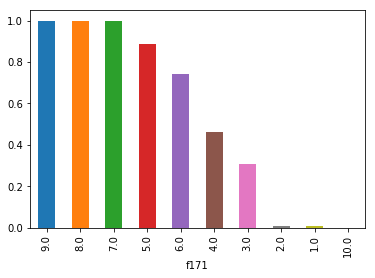

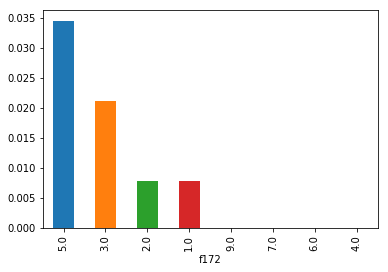

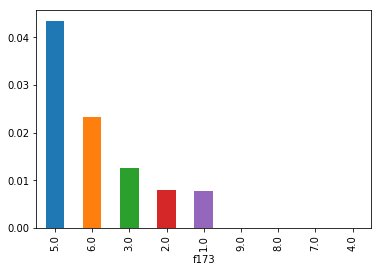

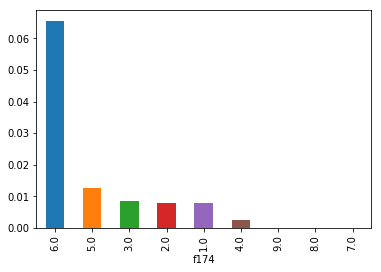

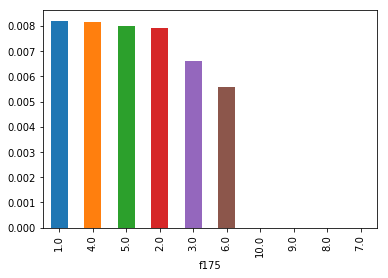

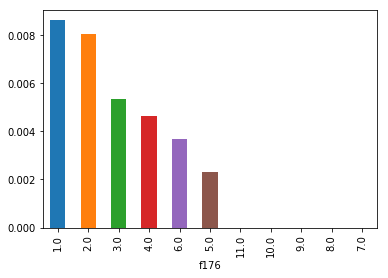

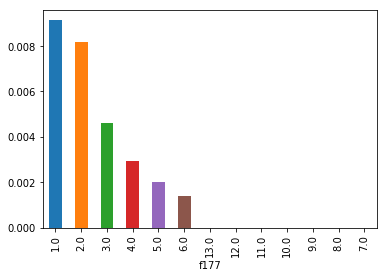

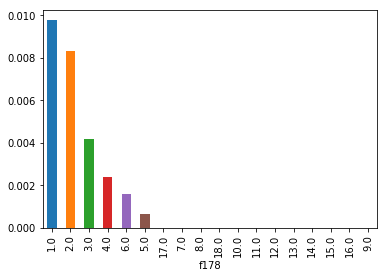

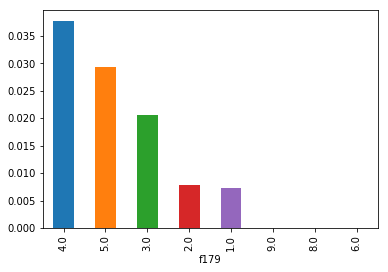

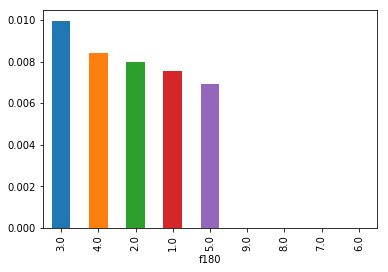

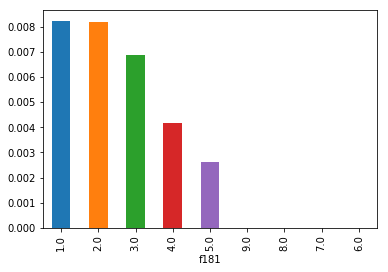

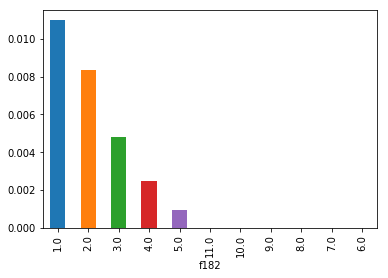

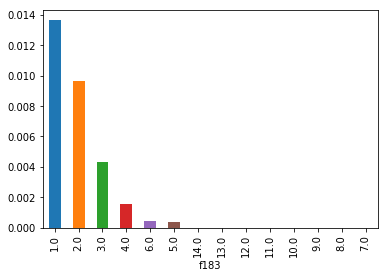

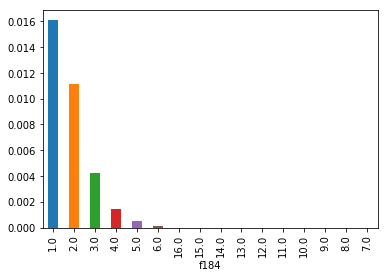

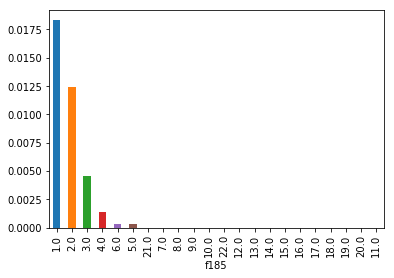

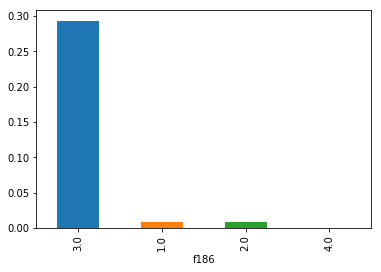

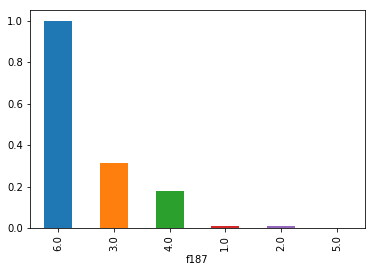

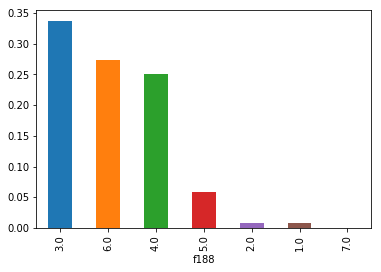

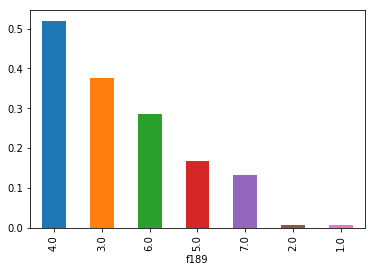

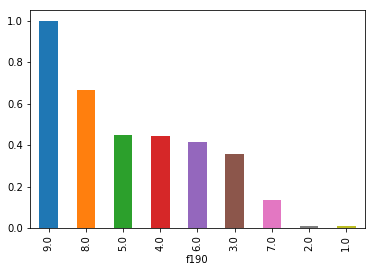

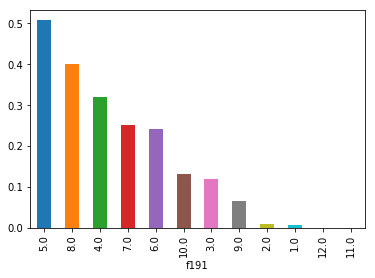

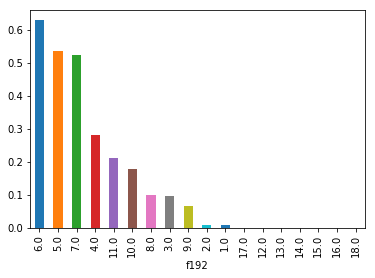

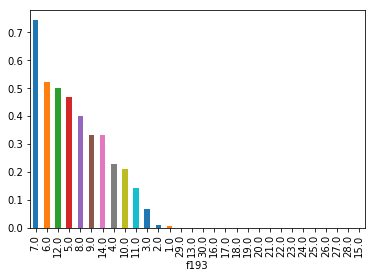

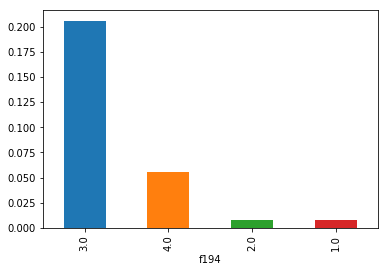

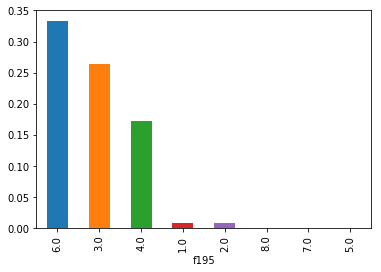

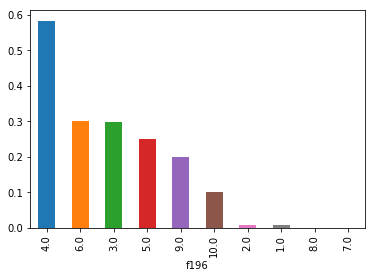

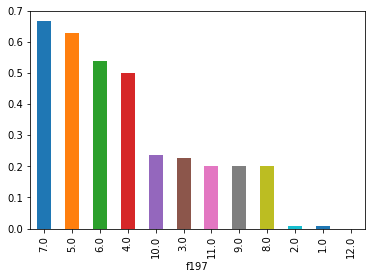

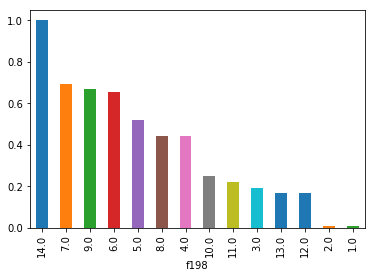

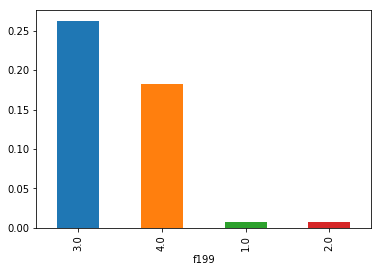

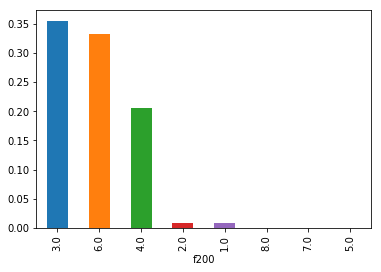

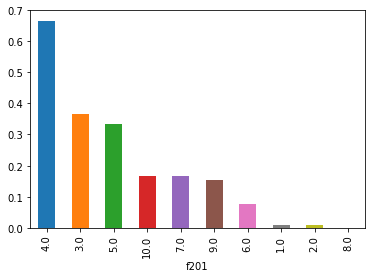

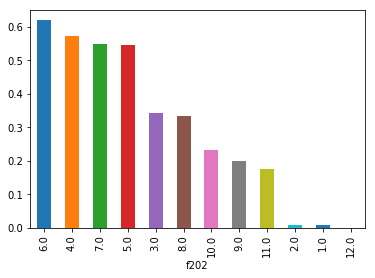

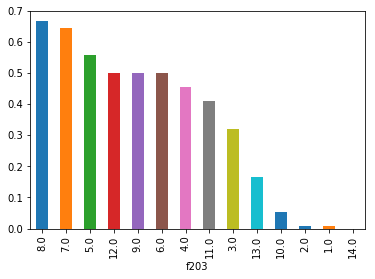

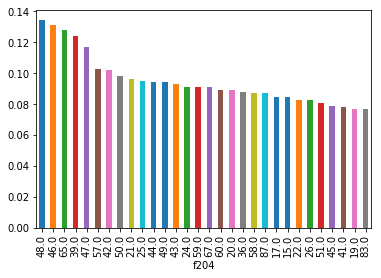

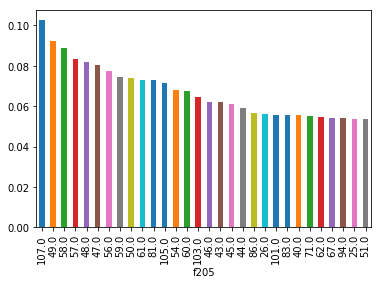

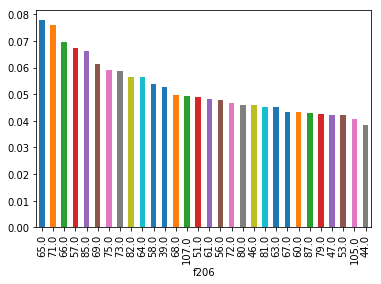

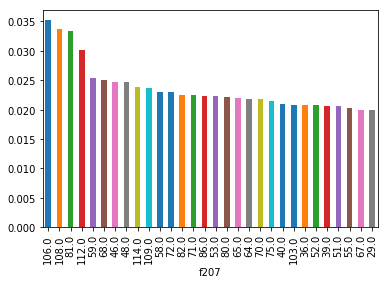

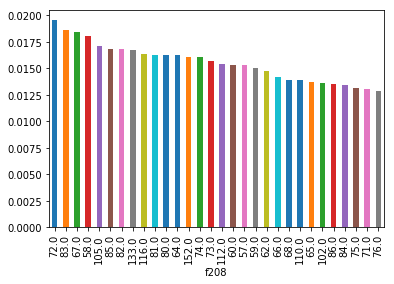

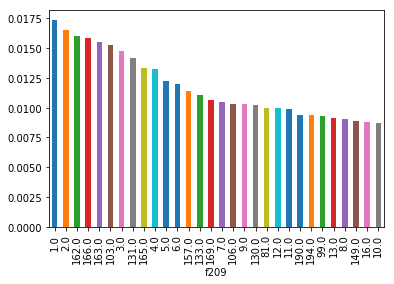

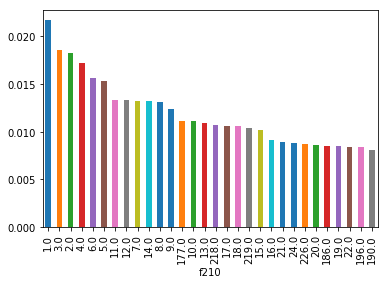

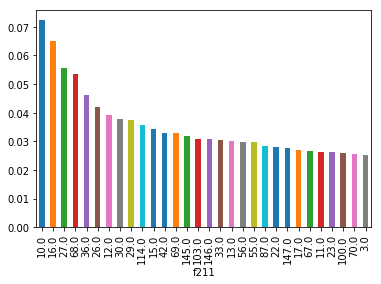

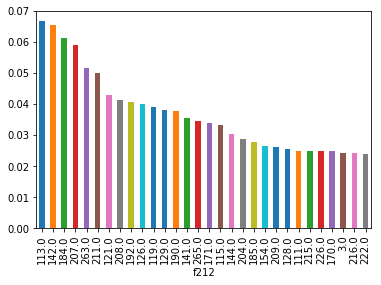

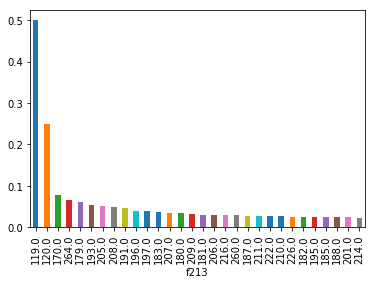

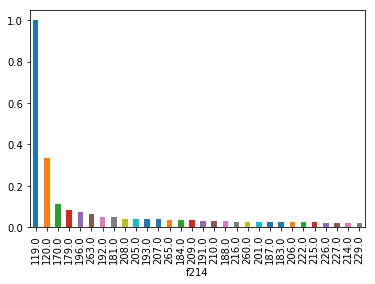

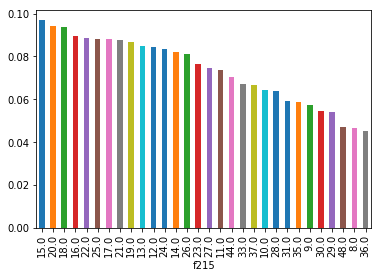

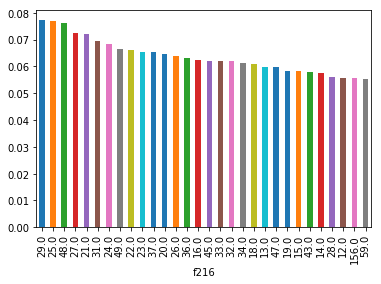

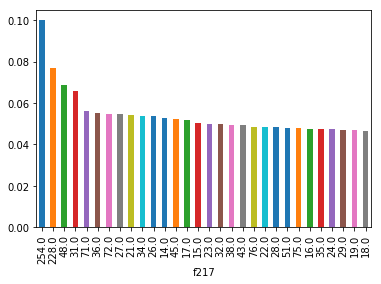

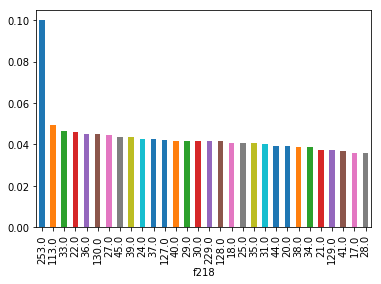

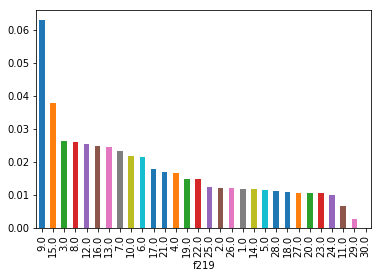

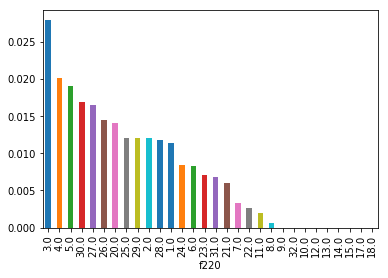

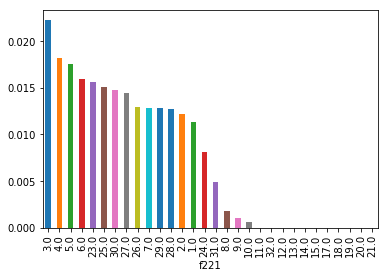

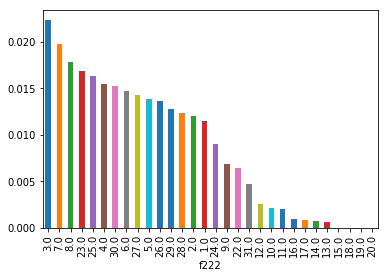

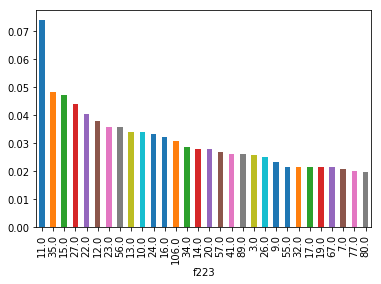

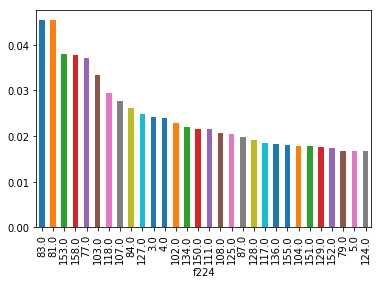

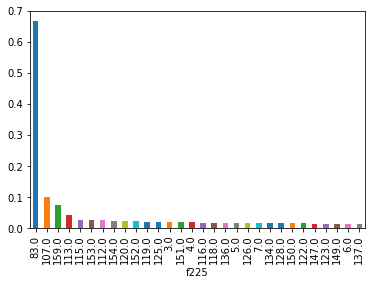

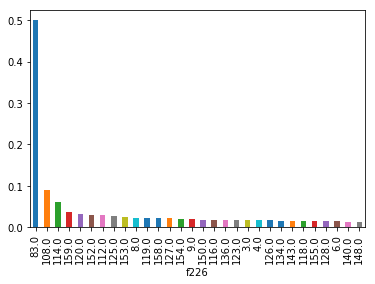

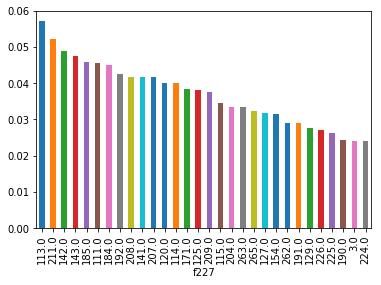

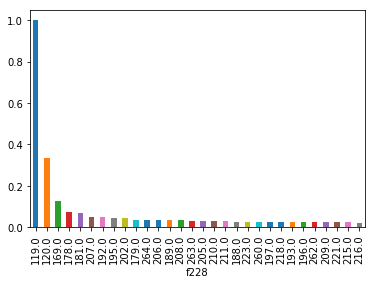

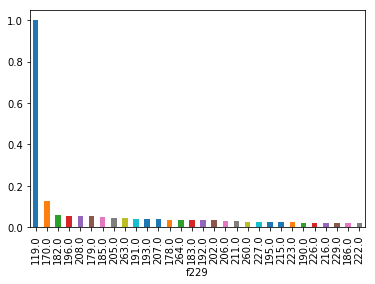

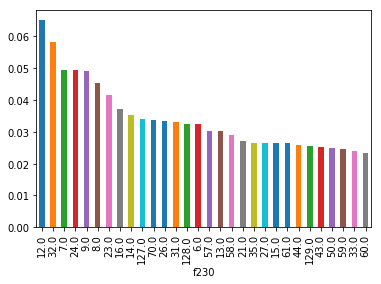

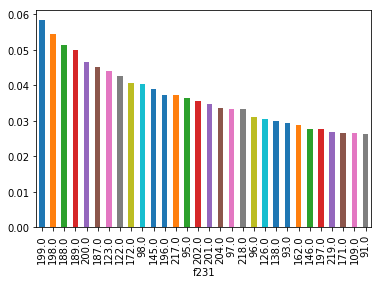

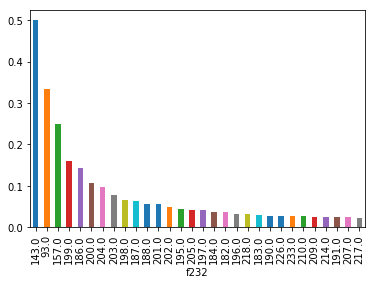

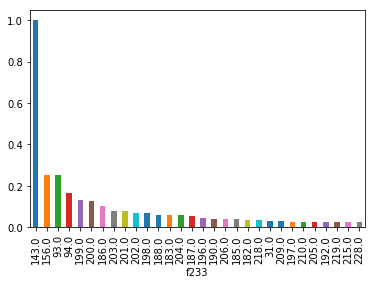

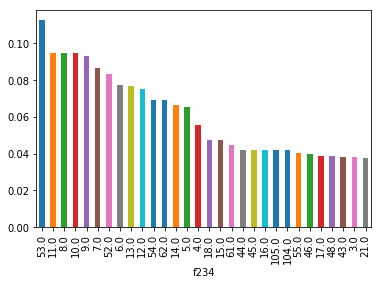

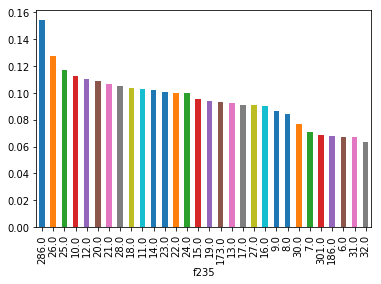

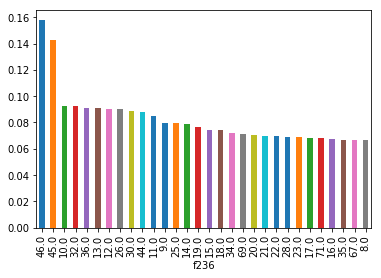

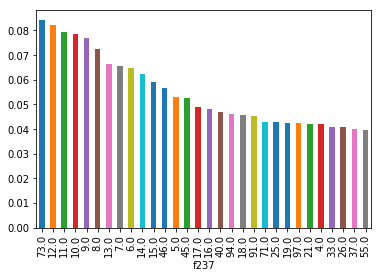

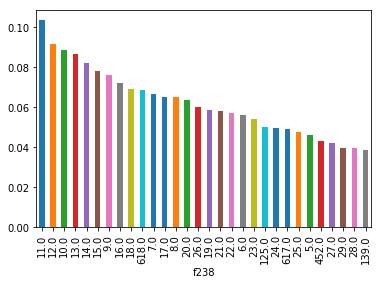

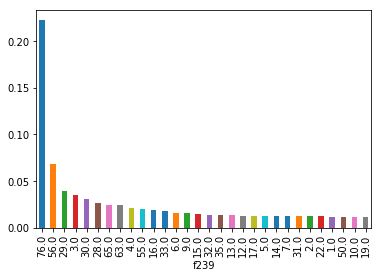

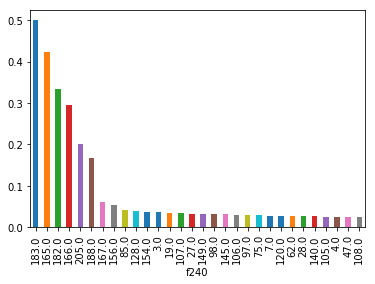

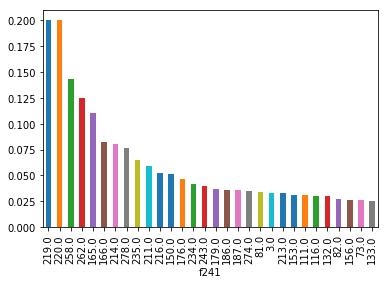

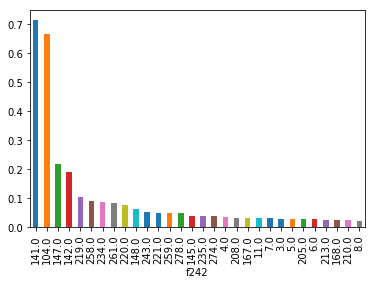

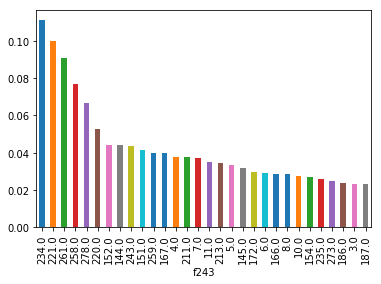

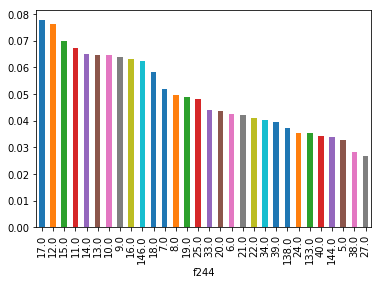

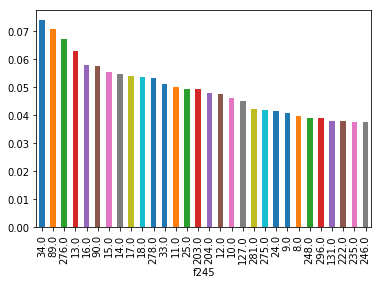

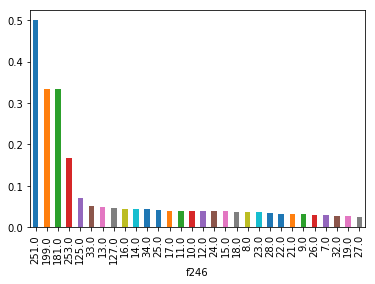

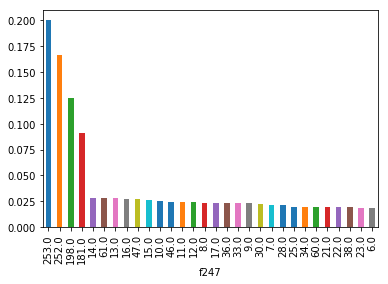

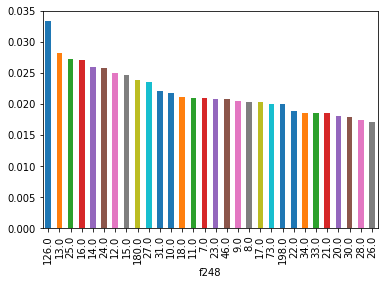

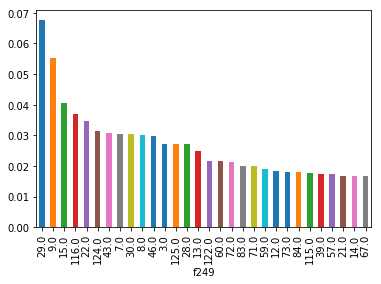

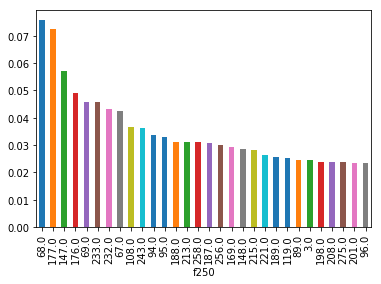

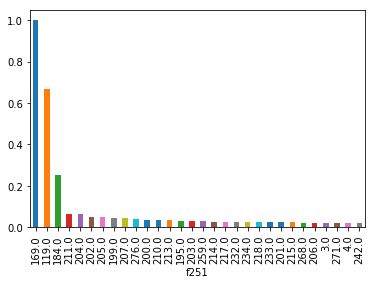

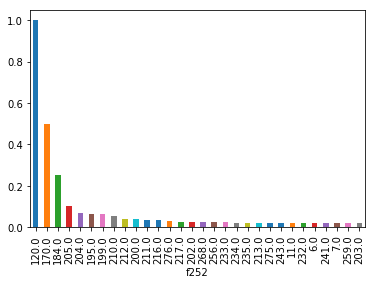

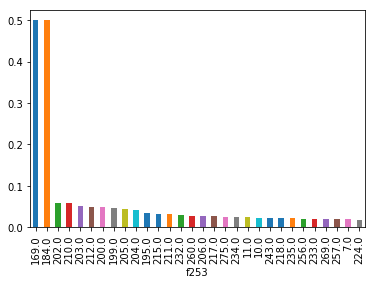

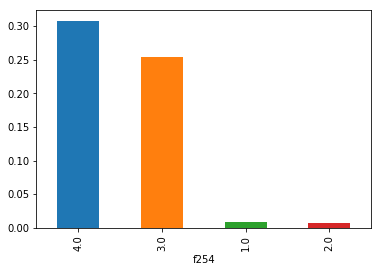

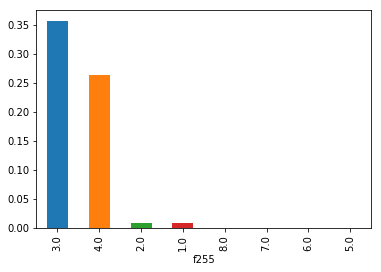

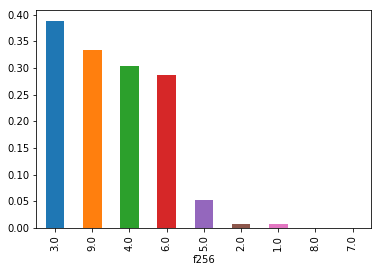

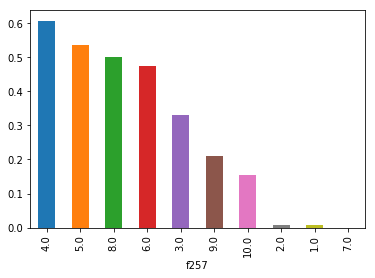

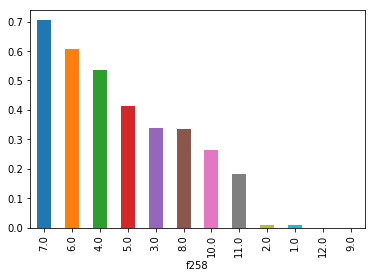

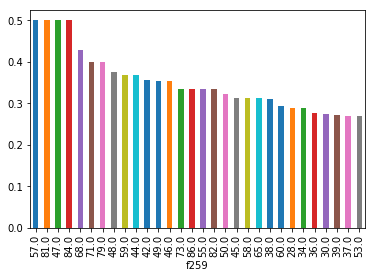

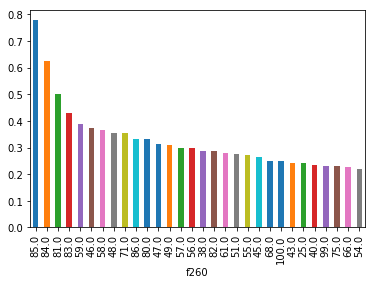

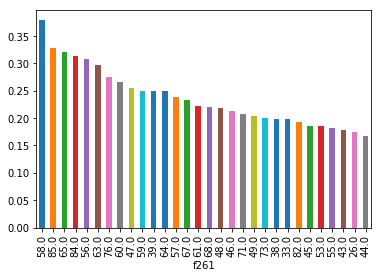

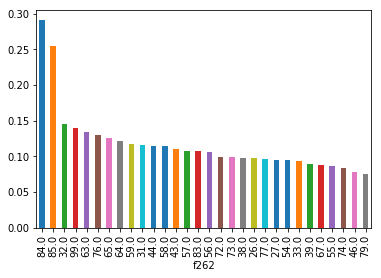

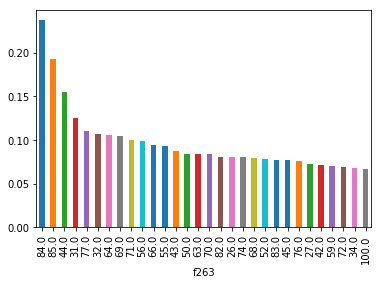

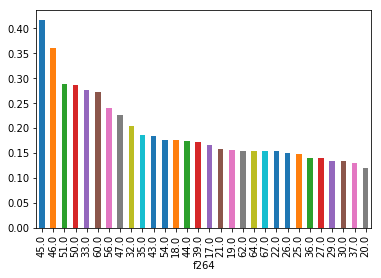

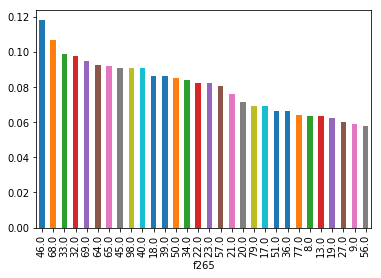

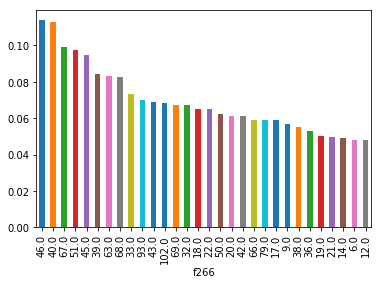

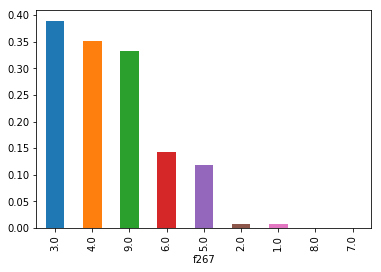

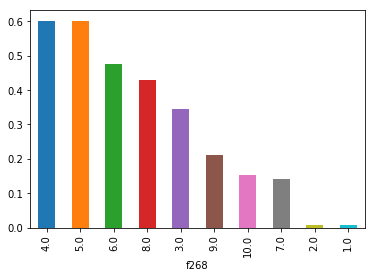

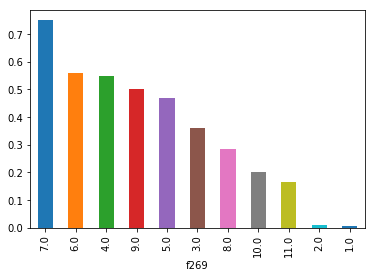

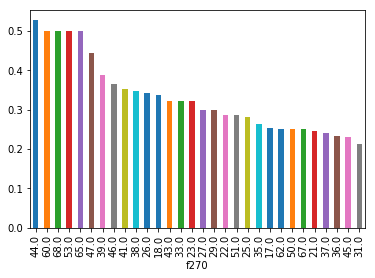

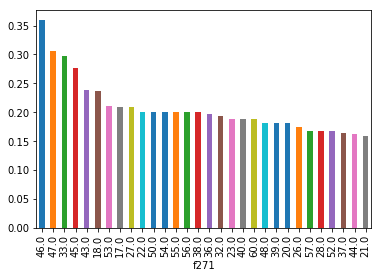

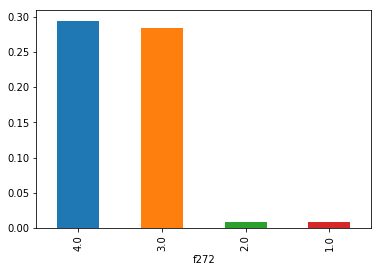

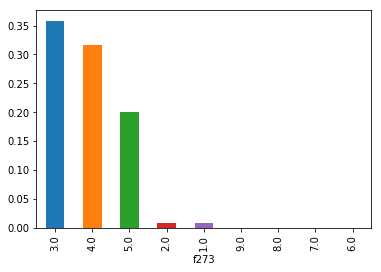

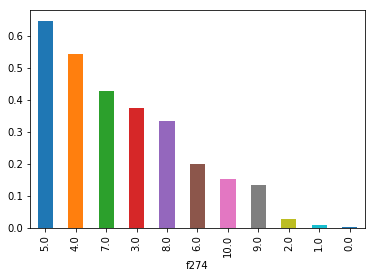

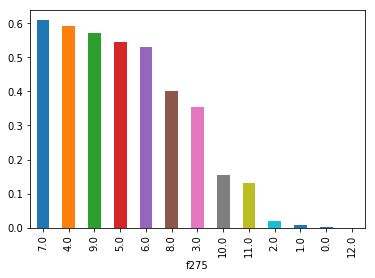

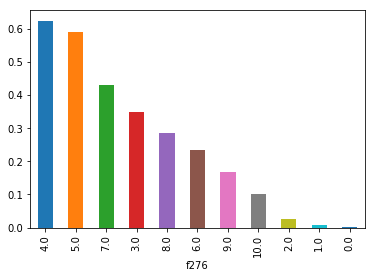

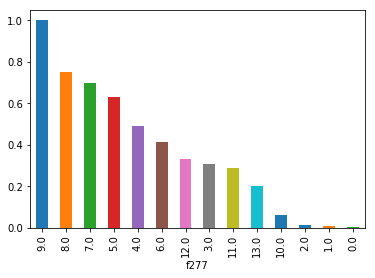

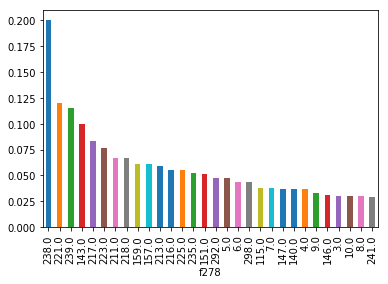

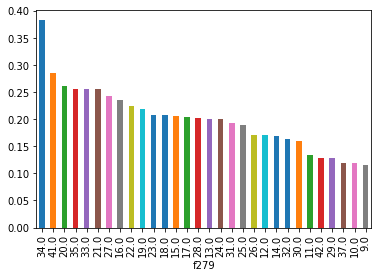

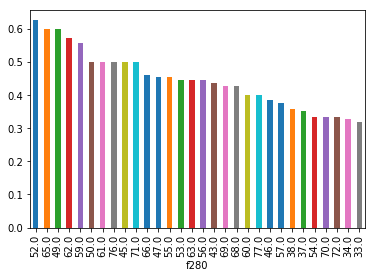

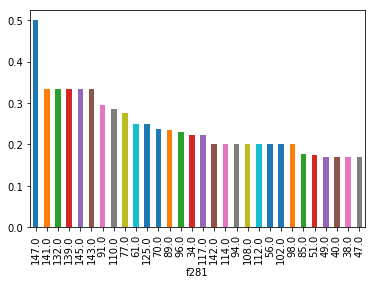

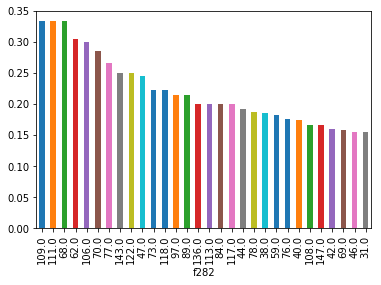

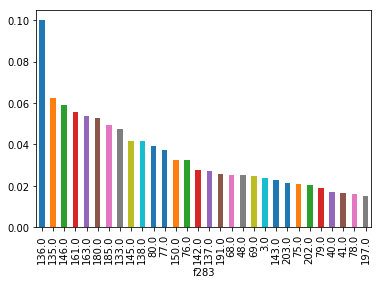

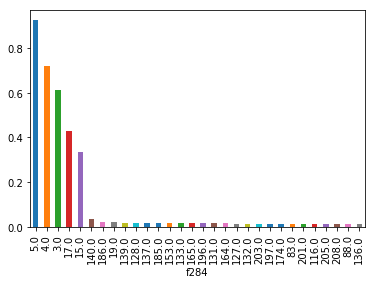

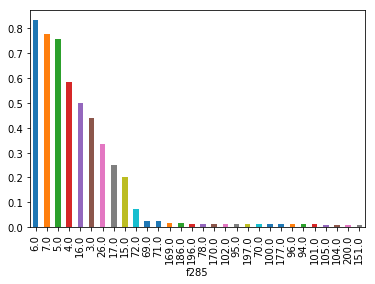

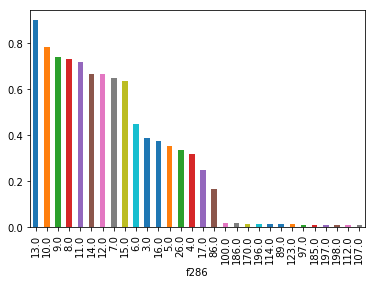

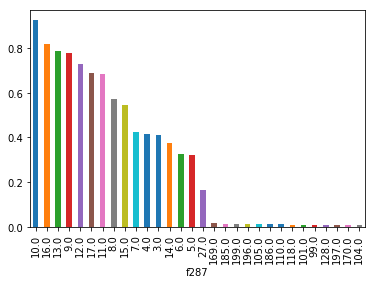

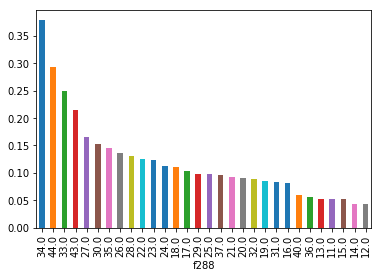

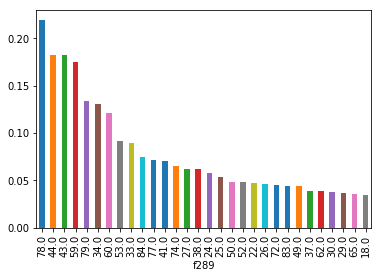

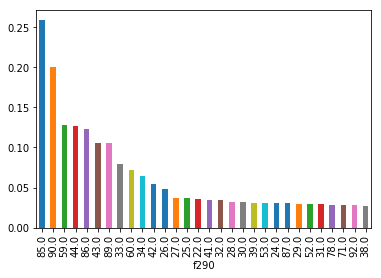

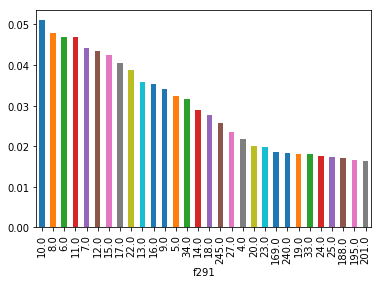

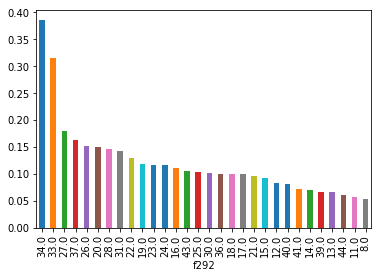

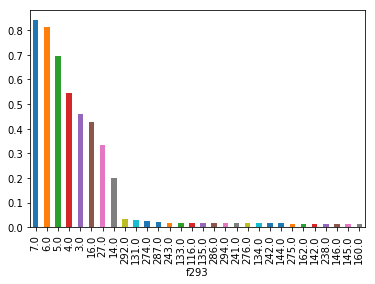

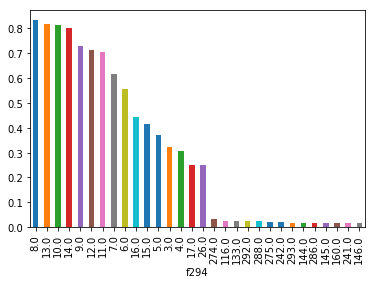

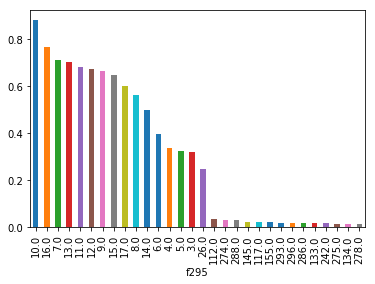

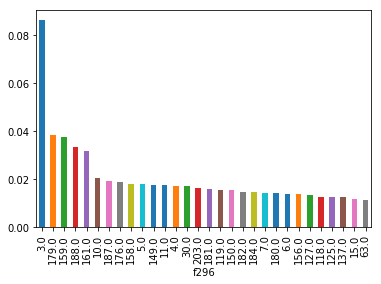

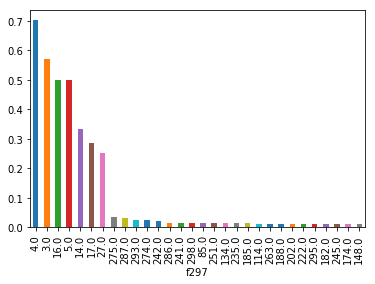

In [7]:
# plot risk distribution
import matplotlib.pyplot as plt
for title,series in feature_distribution_ratio_plot_list:
    # preprocess sereis
#     series = series.sort_index()
#     if len(series.index)>100:
#         mi = series.index.min()
#         ma = series.index.max()+1
#         new_index = series.index.to_series().apply(lambda x:index2range(x,mi,ma,10))
#         series = series.groupby(new_index).sum()
    series = series.sort_values(ascending=False).iloc[:30]
    series.plot.bar()
    plt.show()
#     plt.bar(series.index,series)
#     plt.title(title)
#     plt.xticks(rotation=90)
#     plt.show()

In [240]:
import pickle
with open("risk_distribution.dat","wb") as f:
    pickle.dump(feature_distribution_plot_dict,f)

In [241]:
with open("risk_distribution.dat","rb") as f:
    tmp = pickle.load(f)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(train_data[train_data['label']==1])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').